# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [108]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [109]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    positive_x = X_train[Y_train == 1, :]
    positive_y = Y_train[Y_train == 1]
    negative_x = X_train[Y_train == -1, :]
    negative_y = Y_train[Y_train == -1]

    positive_mu = np.mean(positive_x, axis = 0)
    negative_mu = np.mean(negative_x, axis = 0)

    b = np.log(len(Y_train)/len(positive_y) - 1) + (np.linalg.norm(positive_mu)**2 - np.linalg.norm(negative_mu)**2)/2
    eta = 1/(1 + np.exp(np.matmul(X_test, negative_mu - positive_mu) + b))

    Y_test_pred = np.sign(eta - 1/2)

    return Y_test_pred

def etaHelper(positive_mu, negative_mu, p, positive_cov, negative_cov, X_test):
    positive_cov_inverse = np.linalg.inv(positive_cov)
    negative_cov_inverse = np.linalg.inv(negative_cov)

    positive_coeff = (np.matmul(X_test - positive_mu, positive_cov_inverse) * (X_test - positive_mu)).sum(axis = 1)
    negative_coeff = (np.matmul(X_test - negative_mu, negative_cov_inverse) * (X_test - negative_mu)).sum(axis = 1)

    positive_det = np.linalg.det(positive_cov) ** 0.5
    negative_det = np.linalg.det(negative_cov) ** 0.5

    eta = 1/(1 + ((np.linalg.det(positive_cov) ** 0.5)/np.linalg.det(negative_cov) ** 0.5)*np.exp(0.5*(positive_coeff - negative_coeff)) + np.log(1/p - 1))

    return eta
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,j)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    positive_x = X_train[Y_train == 1, :]
    positive_y = Y_train[Y_train == 1]
    negative_x = X_train[Y_train == -1, :]
    negative_y = Y_train[Y_train == -1]

    positive_mu = np.mean(positive_x, axis = 0)
    negative_mu = np.mean(negative_x, axis = 0)

    positive_cov = len(positive_x) * np.cov(positive_x.T, bias = True)
    negative_cov = len(negative_x) * np.cov(negative_x.T, bias = True)
    net_cov = (positive_cov + negative_cov) / len(X_train)

    Y_test_pred = np.sign(etaHelper(positive_mu, negative_mu, len(positive_y)/len(Y_train), net_cov, net_cov, X_test) - 1/2)

    return Y_test_pred



def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,j)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    positive_x = X_train[Y_train == 1, :]
    positive_y = Y_train[Y_train == 1]
    negative_x = X_train[Y_train == -1, :]
    negative_y = Y_train[Y_train == -1]

    positive_mu = np.mean(positive_x, axis = 0)
    negative_mu = np.mean(negative_x, axis = 0)

    positive_cov = np.cov(positive_x.T, bias=True)
    negative_cov = np.cov(negative_x.T, bias=True)
    Y_test_pred = np.sign(etaHelper(positive_mu, negative_mu, len(positive_y)/len(Y_train), positive_cov, negative_cov, X_test) - 1/2)

    return Y_test_pred
    




In [110]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


<Figure size 640x480 with 0 Axes>

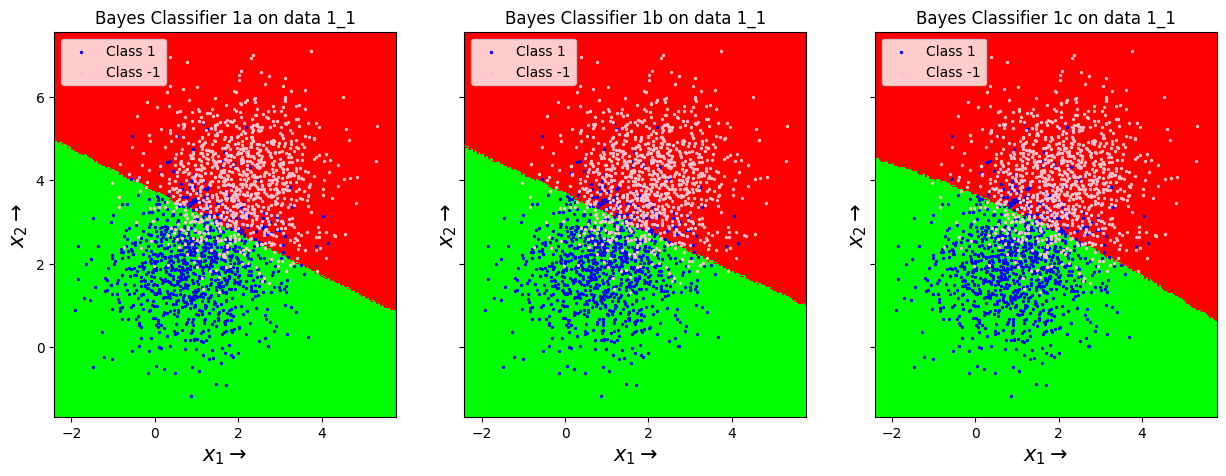

<Figure size 640x480 with 0 Axes>

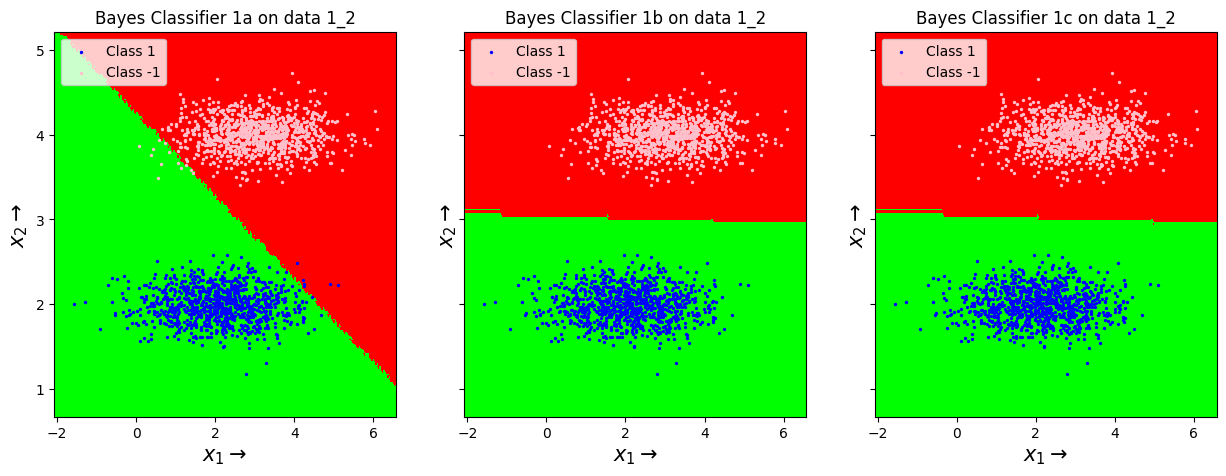

<Figure size 640x480 with 0 Axes>

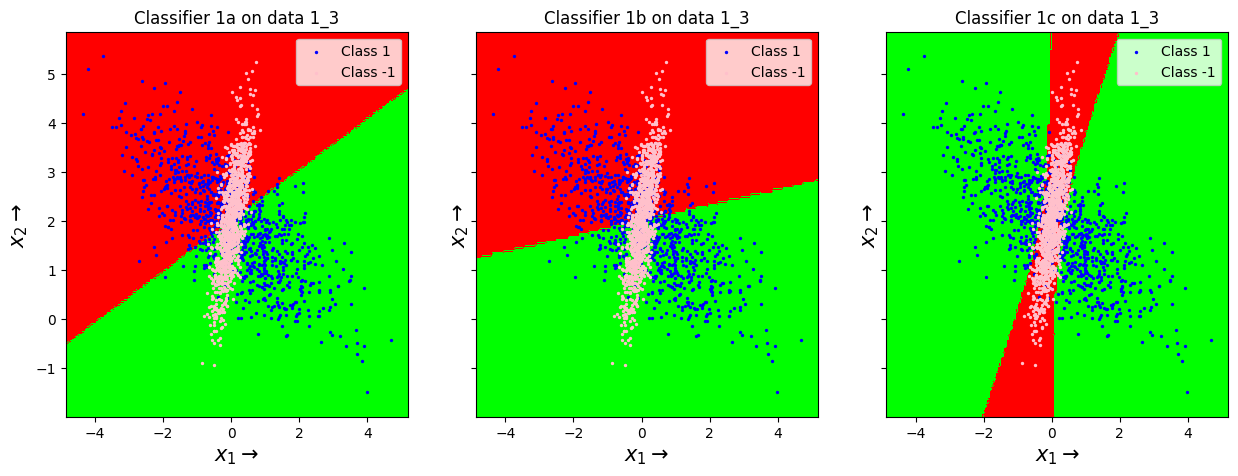

In [111]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

data1_1 = np.load('Data/dataset1_1.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Z_a = Bayes1a(X_train,Y_train,samples)
Z_b = Bayes1b(X_train,Y_train,samples)
Z_c = Bayes1c(X_train,Y_train,samples)

# Start plotting 1st data results
plt.figure(0)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,Z_a.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp1.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp1.set_title('Bayes Classifier 1a on data 1_1')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
subp2.contourf(X,Y,Z_b.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff', label = 'Class 1')
subp2.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = "Class -1")
subp2.set_title('Bayes Classifier 1b on data 1_1')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend()
subp3.contourf(X,Y,Z_c.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff', label = 'Class 1')
subp3.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp3.set_title('Bayes Classifier 1c on data 1_1')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend()
plt.show()

data1_2 = np.load('Data/dataset1_2.npz')
X_train, Y_train, X_test, Y_test = data1_2['arr_0'],data1_2['arr_1'],data1_2['arr_2'],data1_2['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Z_a = Bayes1a(X_train,Y_train,samples)
Z_b = Bayes1b(X_train,Y_train,samples)
Z_c = Bayes1c(X_train,Y_train,samples)

# Start plotting 2nd data results
plt.figure(1)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,Z_a.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp1.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp1.set_title('Bayes Classifier 1a on data 1_2')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend()
subp2.contourf(X,Y,Z_b.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff', label = 'Class 1')
subp2.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp2.set_title('Bayes Classifier 1b on data 1_2')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend()
subp3.contourf(X,Y,Z_c.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp3.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp3.set_title('Bayes Classifier 1c on data 1_2')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend()
plt.show()

data1_3 = np.load('Data/dataset1_3.npz')
X_train, Y_train, X_test, Y_test = data1_3['arr_0'],data1_3['arr_1'],data1_3['arr_2'],data1_3['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Z_a = Bayes1a(X_train,Y_train,samples)
Z_b = Bayes1b(X_train,Y_train,samples)
Z_c = Bayes1c(X_train,Y_train,samples)

# Start plotting 3rd data results
plt.figure(2)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
C2 = subp1.contourf(X,Y,Z_a.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp1.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp1.set_title('Classifier 1a on data 1_3')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend()
subp2.contourf(X,Y,Z_b.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp2.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], s = 2, c ='#FFC0CB', label = 'Class -1')
subp2.set_title('Classifier 1b on data 1_3')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend()
subp3.contourf(X,Y,Z_c.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s = 2, c ='#0000ff',label = 'Class 1')
subp3.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s = 2, c ='#FFC0CB',label = 'Class -1')
subp3.set_title('Classifier 1c on data 1_3')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend()
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Observations:

1. Classifier 1a & Classifier 1b have linear relation wrt features, as the former is just a basic one with conditionall non-dependence and the latter despite addressing some drawbacks in 1_a, still used the same covar matrix. But, Classifier 1c improves over 1b by having different covar matrices, causing the possibility for the classifier to be non-linear wrt features.
2. The Datasets are given in a similar fashion as the Classifiers were. Dataset 1_1 data points are uncorrelated, resulting in similar performance from all classifiers. 1_2 is designed so as to incorporate the modifications done to Classifier 1b over 1a (separated linearly). Whereas in 1_3 there's no linear boundary, causing only Classifier 1c to perform good, while 1a & 1b aren't equipped to deal with this.


Table of errors:
Classifier | Data 1_1 | Data 1_2 | Data 1_3 
--- | --- | --- | ---
1a | 12.6 |  0.85 | 49.7 
1b | 12.45 |  0.0 | 49.5
1c | 12.45 |  0.0 | 13.5


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [101]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_test_pred = np.zeros(X_test.shape[0])
    L = np.matrix([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    X_train1 = X_train[Y_train == 1, :]
    X_train2 = X_train[Y_train == 2, :]
    X_train3 = X_train[Y_train == 3, :]
    X_train4 = X_train[Y_train == 4, :]

    for i in range(X_test.shape[0]):
        eta = [len(X_train1) * np.exp(-0.5 * np.linalg.norm(X_test[i, :] - np.mean(X_train1, axis=0))**2),len(X_train2) * np.exp(-0.5 * np.linalg.norm(X_test[i, :] - np.mean(X_train2, axis=0))**2), len(X_train3) * np.exp(-0.5 * np.linalg.norm(X_test[i, :] - np.mean(X_train3, axis=0))**2), len(X_train4) * np.exp(-0.5 * np.linalg.norm(X_test[i, :] - np.mean(X_train4, axis=0))**2)]
        threshold = np.matmul(np.transpose(eta), L)   
        Y_test_pred[i] = 1 + np.argmin(threshold)

    return Y_test_pred

    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.



    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.matrix([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

    X_train1 = X_train[Y_train == 1, :]
    X_train2 = X_train[Y_train == 2, :]
    X_train3 = X_train[Y_train == 3, :]
    X_train4 = X_train[Y_train == 4, :]

    Y_test_pred = np.zeros(X_test.shape[0])

    covariance = (len(X_train1) * np.cov(X_train1.T, bias=True) + len(X_train2) * np.cov(X_train2.T, bias=True) + len(X_train3) * np.cov(X_train3.T, bias=True) + len(X_train4) * np.cov(X_train4.T, bias=True))/len(X_train)

    for i in range(X_test.shape[0]):
        eta = [len(X_train1) * (np.linalg.det(covariance)**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train1, axis=0)), np.linalg.inv(covariance)), X_test[i, :]-np.mean(X_train1, axis=0))/2),len(X_train2) * (np.linalg.det(covariance)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train2, axis=0)), np.linalg.inv(covariance)), X_test[i, :]-np.mean(X_train2, axis=0))/2), len(X_train3) * (np.linalg.det(covariance)**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train3, axis=0)), np.linalg.inv(covariance)), X_test[i, :]-np.mean(X_train3, axis=0))/2), len(X_train4)*(np.linalg.det(covariance)**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train4, axis=0)), np.linalg.inv(covariance)), X_test[i, :]-np.mean(X_train4, axis=0))/2)]
        threshold = np.matmul(np.transpose(eta), L)
        Y_test_pred[i] = 1 + np.argmin(threshold)

    return Y_test_pred


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.matrix([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

    X_train1 = X_train[Y_train == 1, :]
    X_train2 = X_train[Y_train == 2, :]
    X_train3 = X_train[Y_train == 3, :]
    X_train4 = X_train[Y_train == 4, :]

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        eta = [len(X_train1) * (np.linalg.det(np.cov(X_train1.T, bias=True))**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train1, axis=0)), np.linalg.inv(np.cov(X_train1.T, bias=True))), X_test[i, :]-np.mean(X_train1, axis=0))/2),len(X_train2) * (np.linalg.det(np.cov(X_train2.T, bias=True))**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train2, axis=0)), np.linalg.inv(np.cov(X_train2.T, bias=True))), X_test[i, :]-np.mean(X_train2, axis=0))/2),len(X_train3) * (np.linalg.det(np.cov(X_train3.T, bias=True))**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train3, axis=0)), np.linalg.inv(np.cov(X_train3.T, bias=True))), X_test[i, :]-np.mean(X_train3, axis=0))/2),len(X_train4) * (np.linalg.det(np.cov(X_train4.T, bias=True))**(-0.5)) * np.exp(-np.matmul(np.matmul(np.transpose(X_test[i, :]-np.mean(X_train4, axis=0)), np.linalg.inv(np.cov(X_train4.T, bias=True))), X_test[i, :]-np.mean(X_train4, axis=0))/2)]
        threshold = np.matmul(np.transpose(eta), L)
        Y_test_pred[i] = 1 + np.argmin(threshold)

    return Y_test_pred
    


In [102]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 640x480 with 0 Axes>

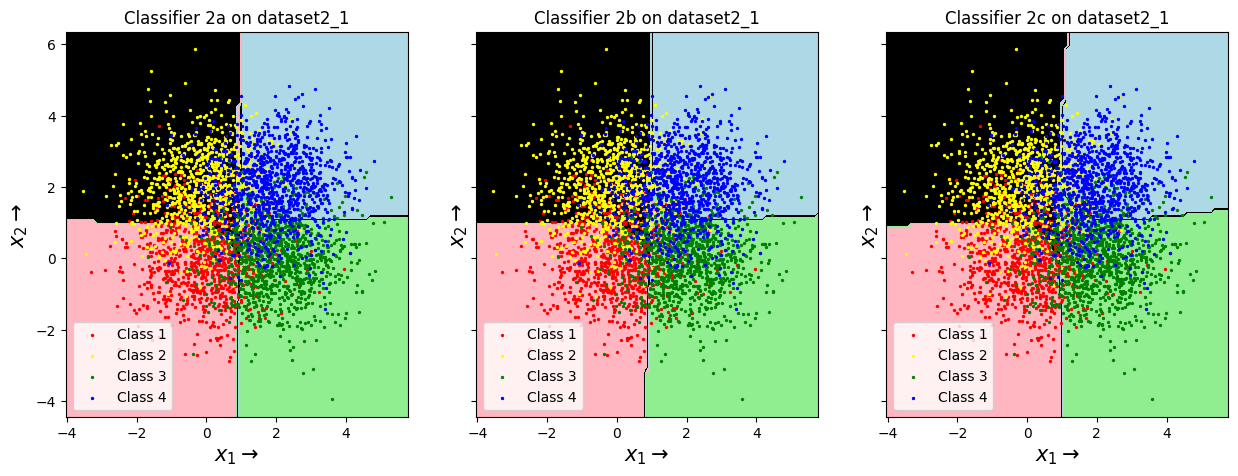

<Figure size 640x480 with 0 Axes>

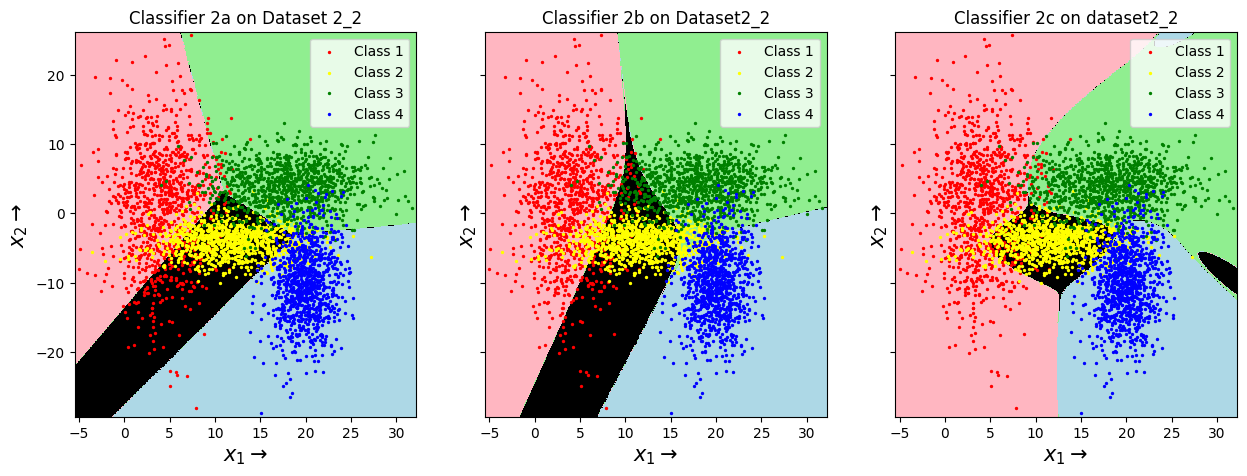

In [114]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

data2_1 = np.load('Data/dataset2_1.npz')
X_train, Y_train, X_test, Y_test = data2_1['arr_0'], data2_1['arr_1'], data2_1['arr_2'], data2_1['arr_3']
X_min = np.min(X_train, axis=0)
X_max = np.max(X_train, axis=0)
X, Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.1), np.arange(X_min[1]-0.5, X_max[1]+0.5, 0.1))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)
Z_a = Bayes2a(X_train, Y_train, samples)
Z_b = Bayes2b(X_train, Y_train, samples)
Z_c = Bayes2c(X_train, Y_train, samples)

# Start plotting 1st Data results
plt.figure(0)
f, (subp1, subp2, subp3) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(15, 5))
subp1.contourf(X, Y, Z_a.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp1.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp1.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp1.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp1.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp1.set_title('Classifier 2a on dataset2_1')
subp1.legend()
subp1.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp2.contourf(X, Y, Z_b.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp2.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp2.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp2.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp2.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp2.set_title('Classifier 2b on dataset2_1')
subp2.legend()
subp2.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp3.contourf(X, Y, Z_c.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp3.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp3.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp3.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp3.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp3.set_title('Classifier 2c on dataset2_1')
subp3.legend()
subp3.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$', size=15)
plt.show()

data2_2 = np.load('Data/dataset2_2.npz')
X_train, Y_train, X_test, Y_test = data2_2['arr_0'], data2_2['arr_1'], data2_2['arr_2'], data2_2['arr_3']
X_min = min(X_train[:, 0]), min(X_train[:, 1])
X_max = max(X_train[:, 0]), max(X_train[:, 1])
X, Y = np.meshgrid(np.arange(X_min[0]-0.5, X_max[0]+0.5, 0.1), np.arange(X_min[1]-0.5, X_max[1]+0.5, 0.1))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)
Z_a = Bayes2a(X_train, Y_train, samples)
Z_b = Bayes2b(X_train, Y_train, samples)
Z_c = Bayes2c(X_train, Y_train, samples)

#Start plotting 2nd Data results
plt.figure(1)
f, (subp1, subp2, subp3) = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(15, 5))
subp1.contourf(X, Y, Z_a.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp1.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp1.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp1.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp1.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp1.set_title('Classifier 2a on Dataset 2_2')
subp1.legend()
subp1.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp2.contourf(X, Y, Z_b.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp2.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp2.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp2.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp2.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp2.set_title('Classifier 2b on Dataset2_2')
subp2.legend()
subp2.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp3.contourf(X, Y, Z_c.reshape(X.shape), colors=['#FFB6C1', '#90EE90', '#000000', '#ADD8E6'])
subp3.scatter(X_train[Y_train == 1][:, 0],X_train[Y_train == 1][:, 1], s=2, c='r', label='Class 1')
subp3.scatter(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], s=2, c='#FFFF00', label='Class 2')
subp3.scatter(X_train[Y_train == 3][:, 0],X_train[Y_train == 3][:, 1], s=2, c='g', label='Class 3')
subp3.scatter(X_train[Y_train == 4][:, 0],X_train[Y_train == 4][:, 1], s=2, c='b', label='Class 4')
subp3.set_title('Classifier 2c on dataset2_2')
subp3.legend()
subp3.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$', size=15)
plt.show()


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Observations:

1. The classifiers & data are designed in a similar fashion as in Problem 1. Classifiers 2a, 2b are equipped with dealing linear separable regons(latter with a same covar usage). Whereas 2c fares better at dealing with non-linear regions, due to it's different matrix usage.
2. From the errors, it can be inferred that 2a is the worst (2b is similar), and 2c is the better among them.
Table of Errors:
The expected loss is given by the following table :

|  | 2a       | 2b      | 2c       |
|--------------------|---------|--------|---------|
| 2_1                  | 0.4297 | 0.429  | 0.4277 |
| 2_2                  | 0.183  | 0.189 | 0.140 |

Confision Matrices :

Dataset 2_1

2a : 
$\begin{bmatrix} 633& 219& 136&  12\\ 97& 738&  62& 103\\86&  49& 770&  95\\ 15& 136& 194& 655 \end{bmatrix}$ 2b : 
$\begin{bmatrix} 633& 218& 137&  12\\ 95& 743&  60& 102\\ 84& 49& 773&  94\\16& 137& 196& 651 \end{bmatrix}$ 
2c : 
$\begin{bmatrix}634& 217& 138&  11\\99& 742& 61& 98\\ 87& 47& 772&  94\\ 15& 134& 201& 650 \end{bmatrix}$ 
 

Dataset 2_2

2a : 
$\begin{bmatrix} 830& 150&  18&  2\\ 93& 784&  46& 77\\ 30&  61& 905& 4\\ 0&  23& 78&899\end{bmatrix}$ 
2b : 
$\begin{bmatrix} 891&106& 3&  0\\ 119& 691& 124& 66\\ 23&106&864& 7\\ 0&   5& 102& 893 \end{bmatrix}$ 
2c : 
$\begin{bmatrix}901&  80&  19& 0\\64& 824& 46& 66\\ 19&  31& 936&  14\\ 0&  36&  48& 916 \end{bmatrix}$ 

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c =[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 640x480 with 0 Axes>

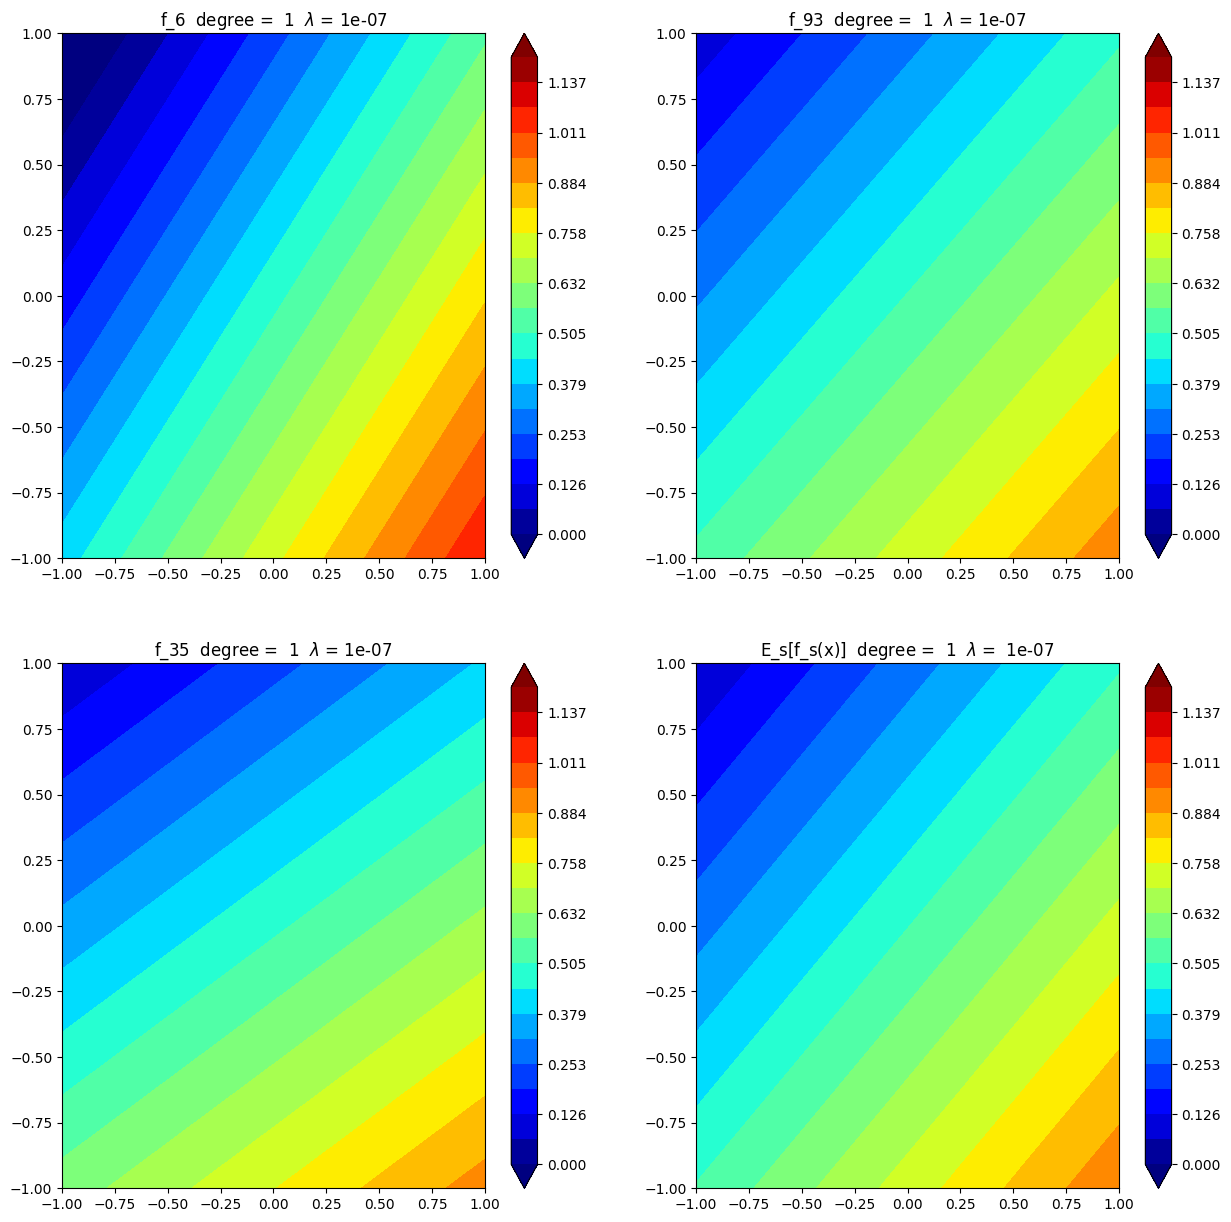

Degree= 1 lambda= 1e-07
Bias = 0.28355607214948125
Variance = 0.006650284708113028
MSE = 0.28472299690939973


<Figure size 640x480 with 0 Axes>

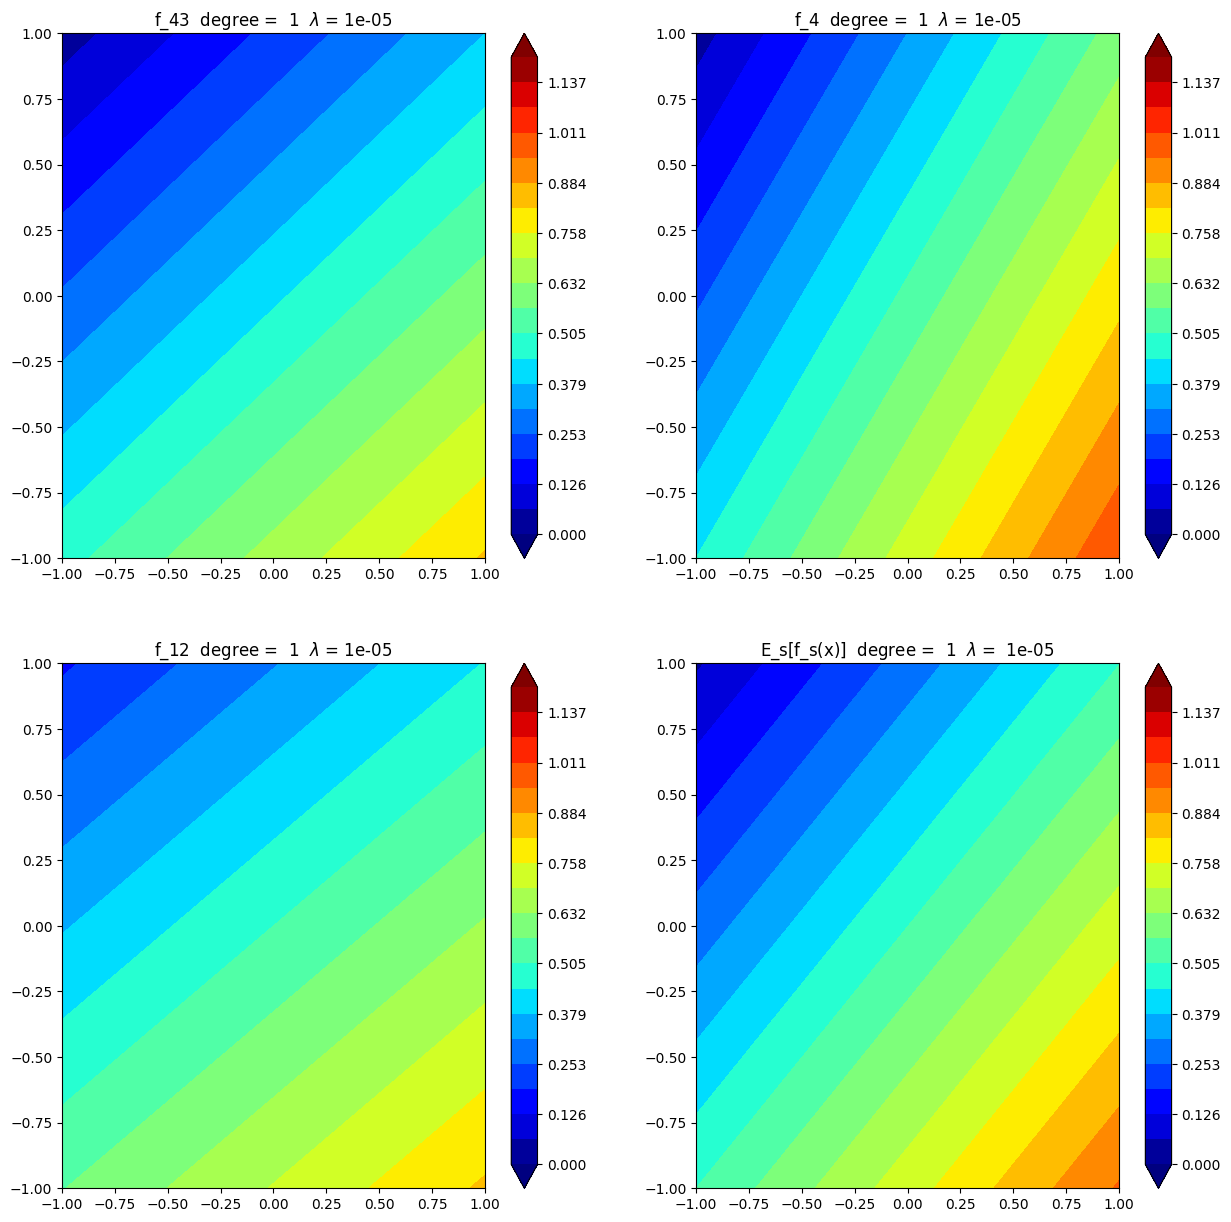

Degree= 1 lambda= 1e-05
Bias = 0.2861411180717221
Variance = 0.007044985446695182
MSE = 0.28744137857206303


<Figure size 640x480 with 0 Axes>

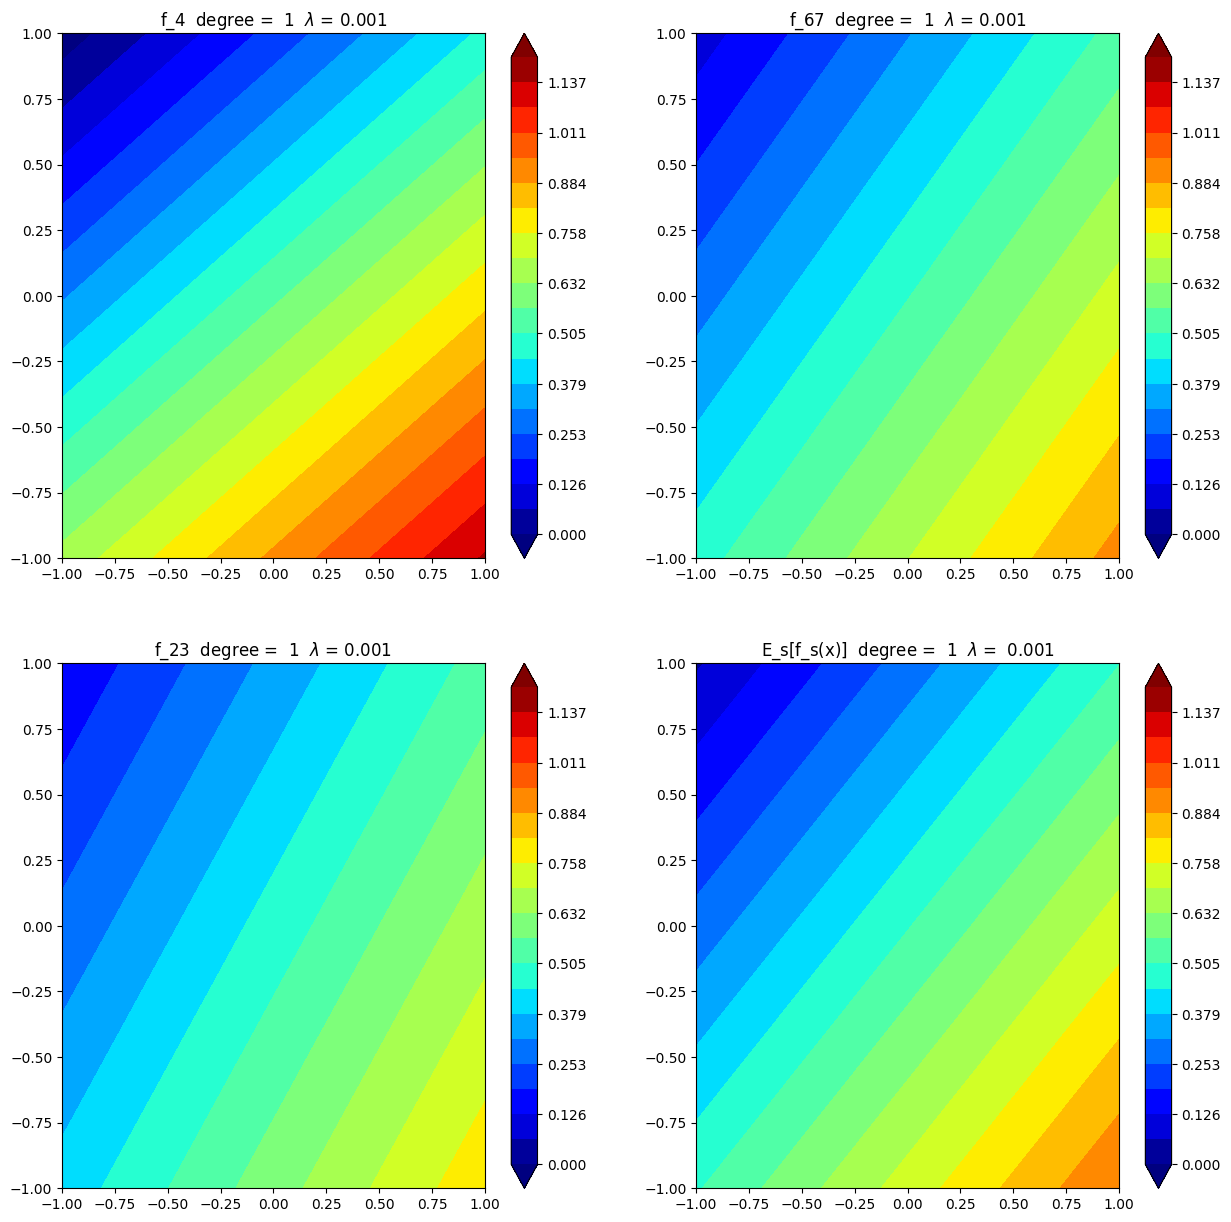

Degree= 1 lambda= 0.001
Bias = 0.2856234205021497
Variance = 0.006785797250625439
MSE = 0.2868257829895216


<Figure size 640x480 with 0 Axes>

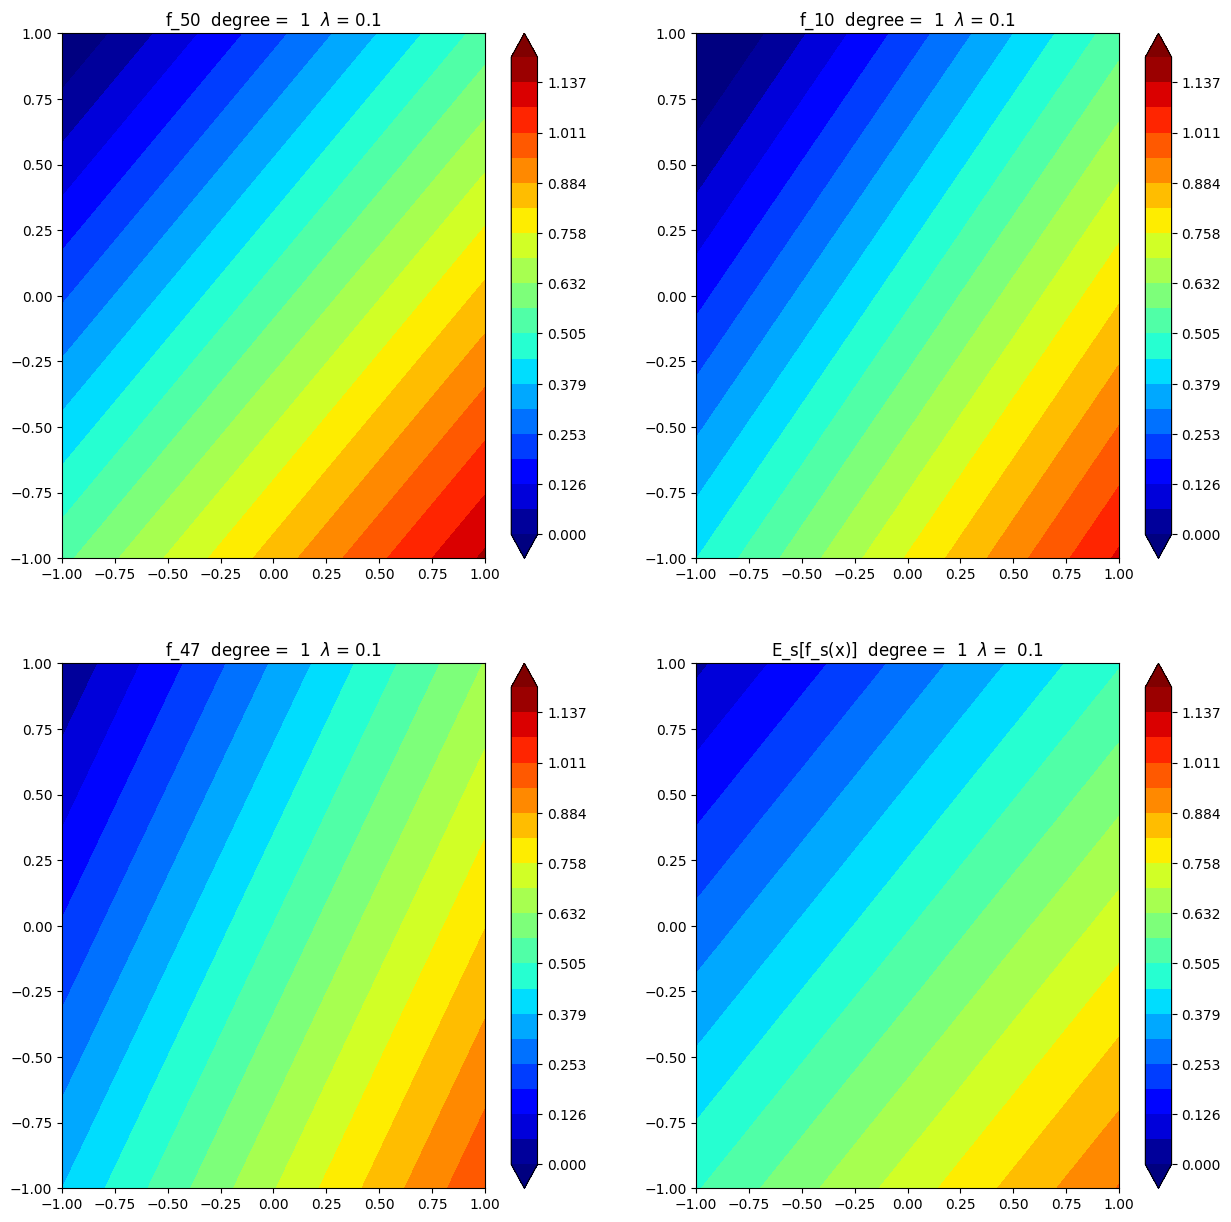

Degree= 1 lambda= 0.1
Bias = 0.2793073549262634
Variance = 0.006805874859815116
MSE = 0.2803174953993943


<Figure size 640x480 with 0 Axes>

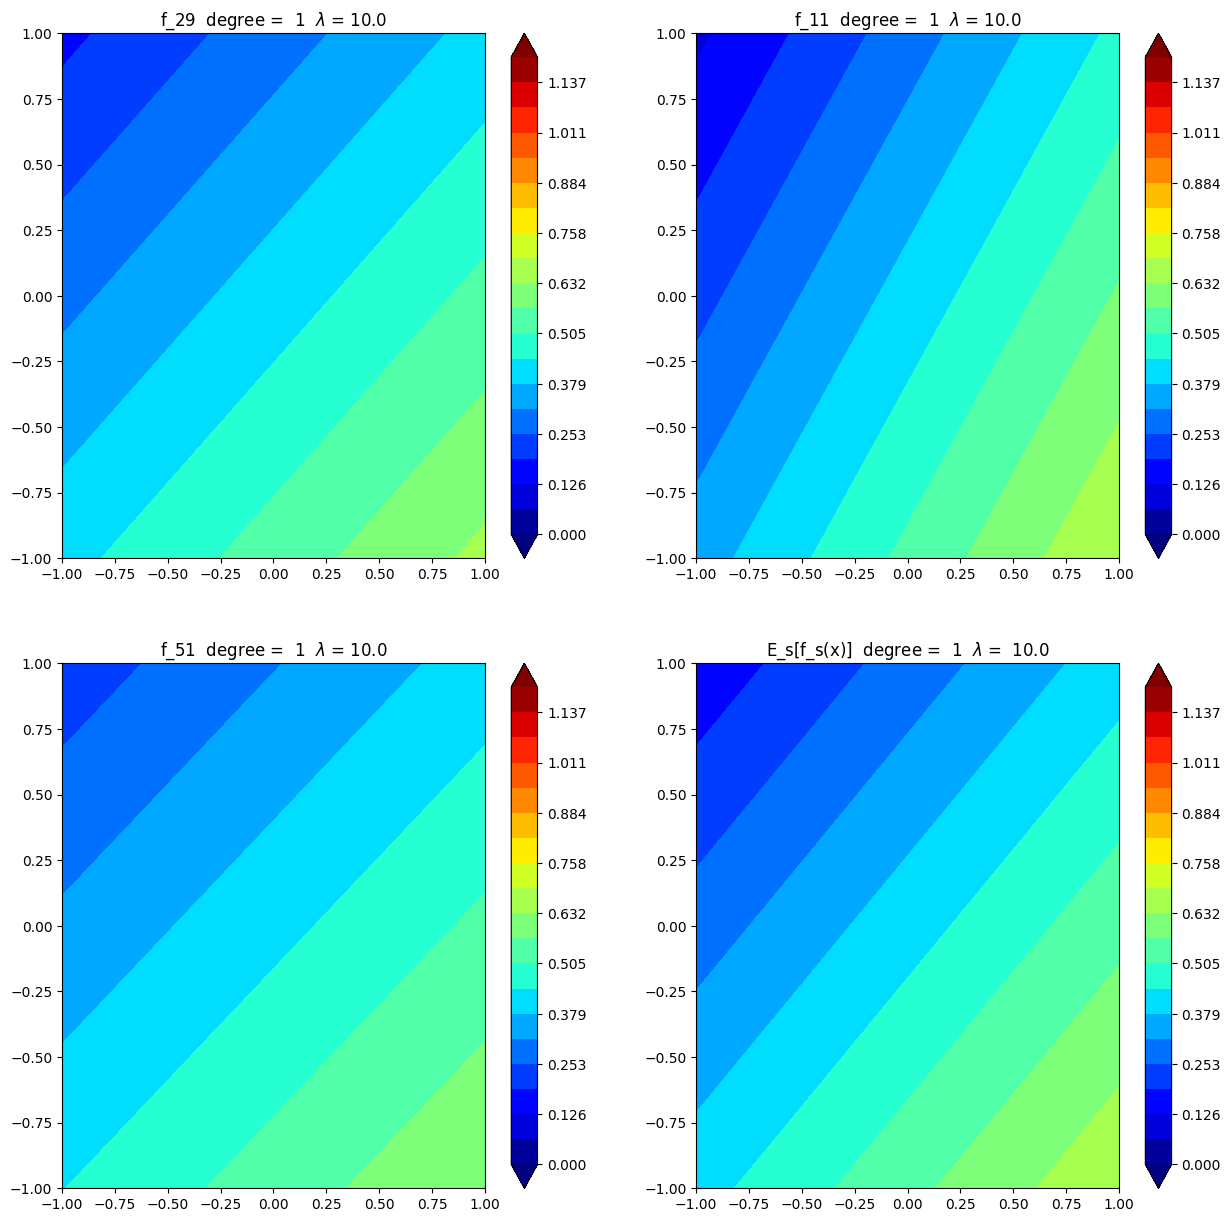

Degree= 1 lambda= 10.0
Bias = 0.185379321194297
Variance = 0.0034840424649166756
MSE = 0.18539641116352884


<Figure size 640x480 with 0 Axes>

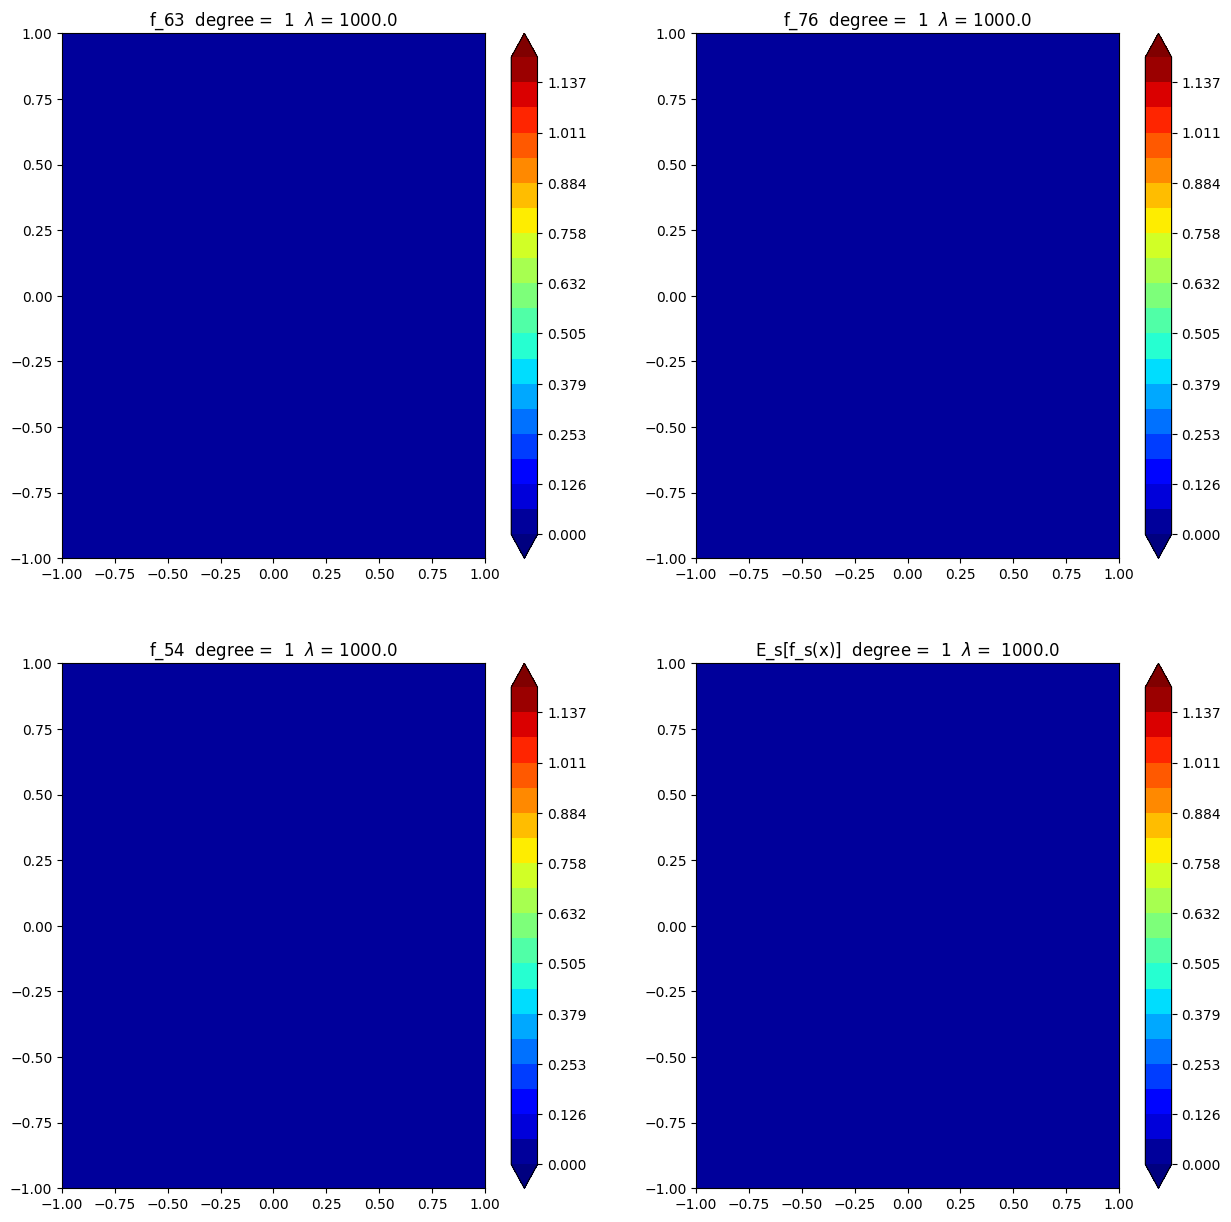

Degree= 1 lambda= 1000.0
Bias = 0.0005744424052577639
Variance = 1.214447687296002e-05
MSE = 0.0005738728595470193


<Figure size 640x480 with 0 Axes>

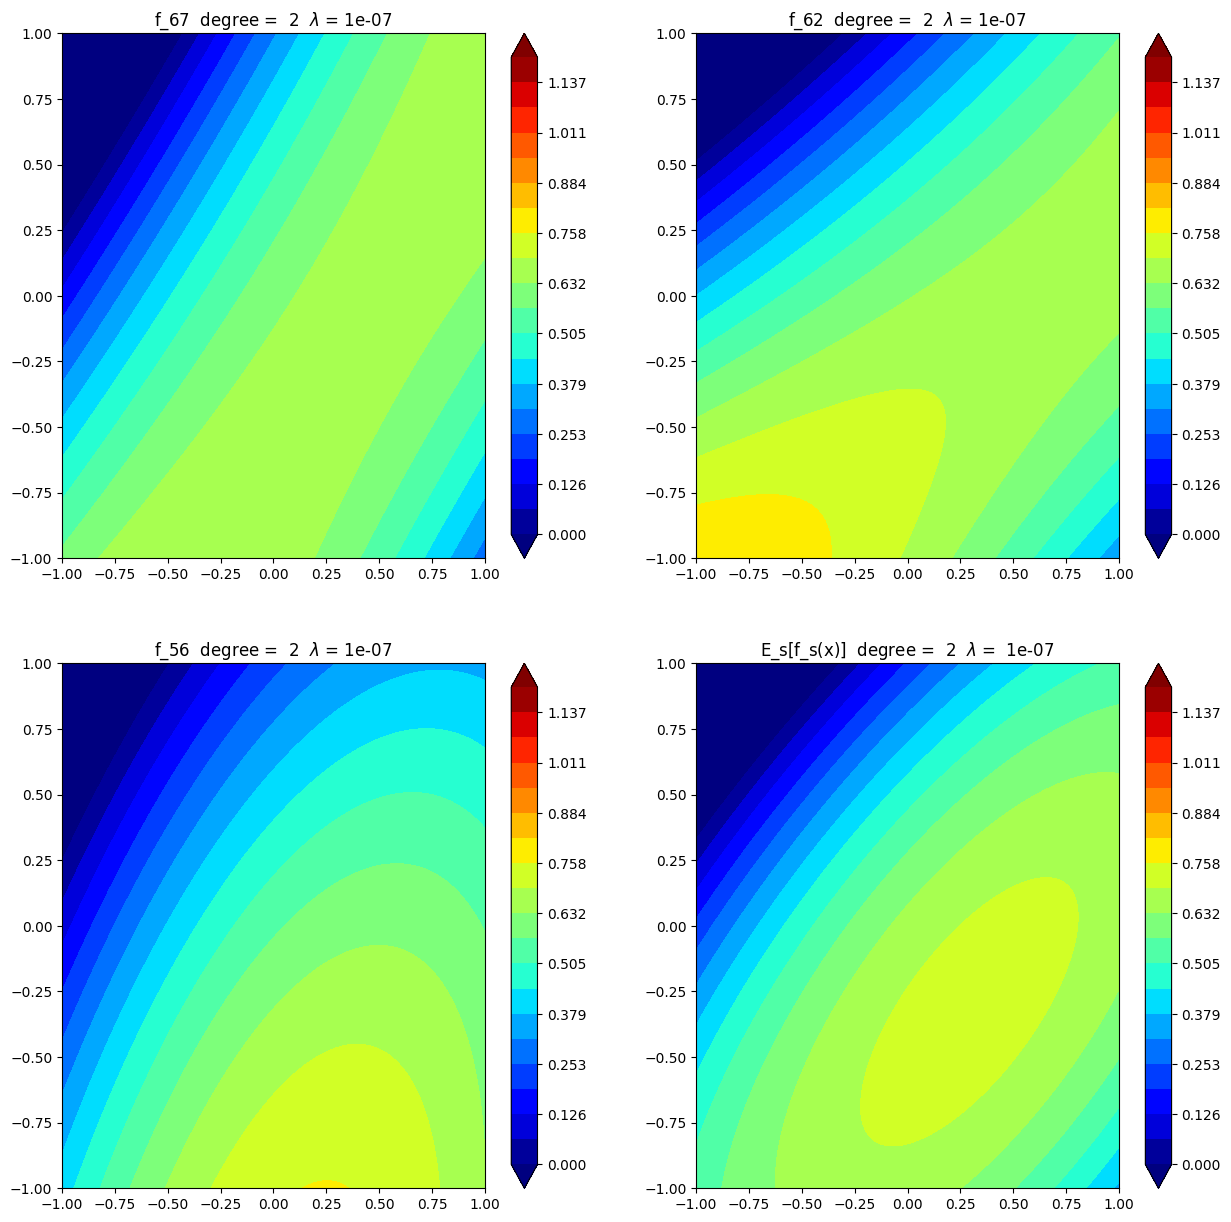

Degree= 2 lambda= 1e-07
Bias = 0.3075879589320841
Variance = 0.008244400853698323
MSE = 0.30936397139601096


<Figure size 640x480 with 0 Axes>

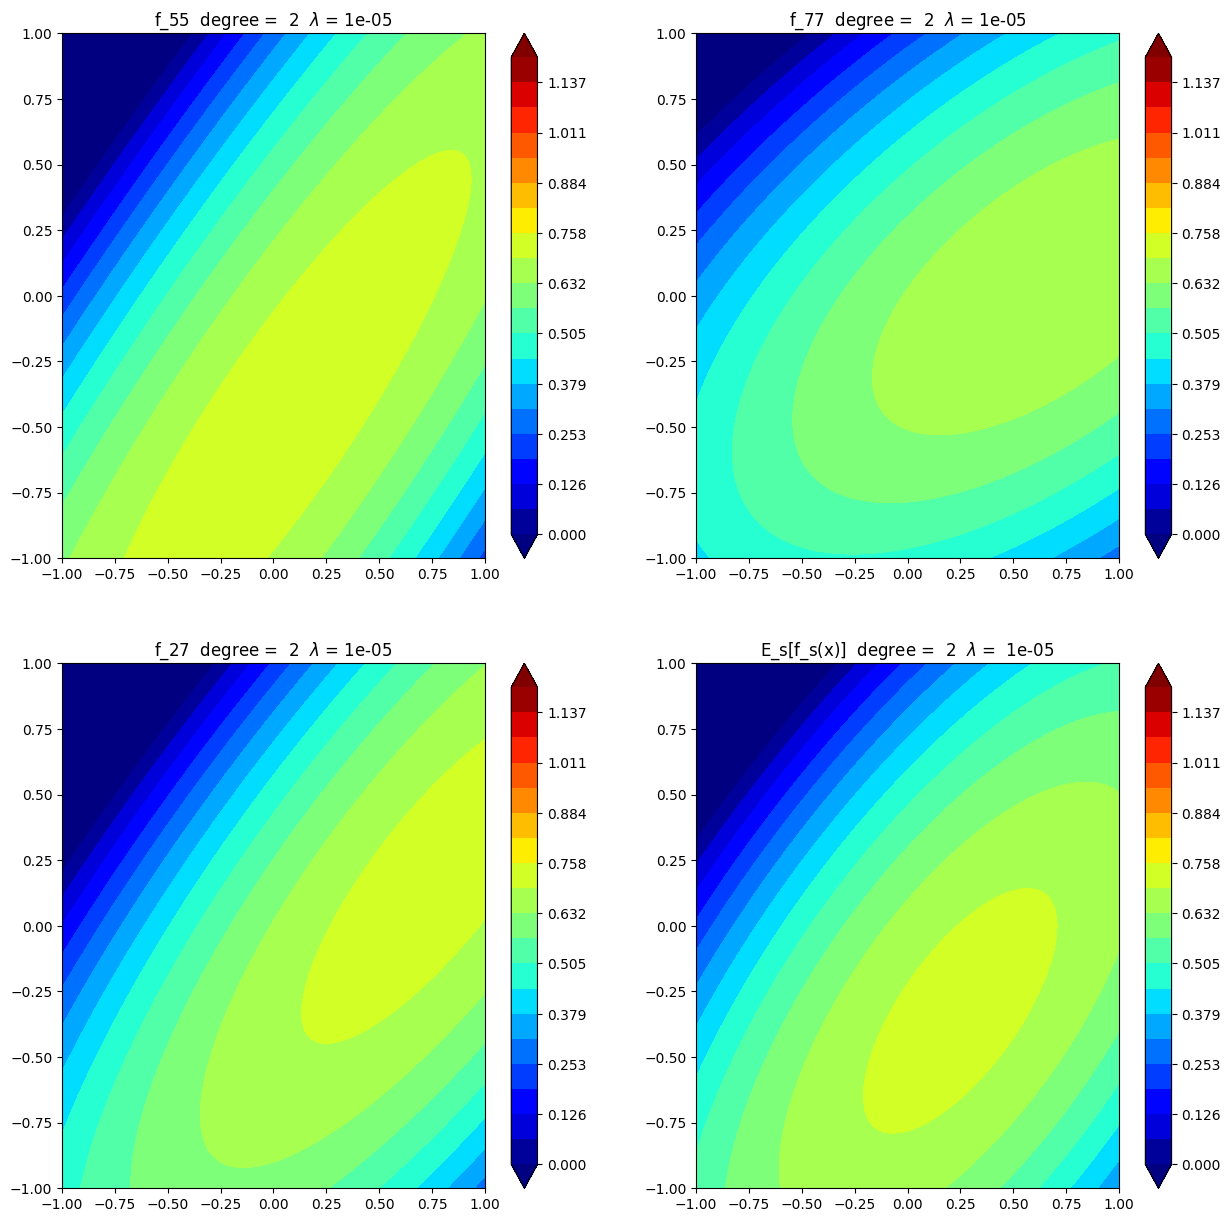

Degree= 2 lambda= 1e-05
Bias = 0.30565651529446547
Variance = 0.00818232883348078
MSE = 0.30802818941854593


<Figure size 640x480 with 0 Axes>

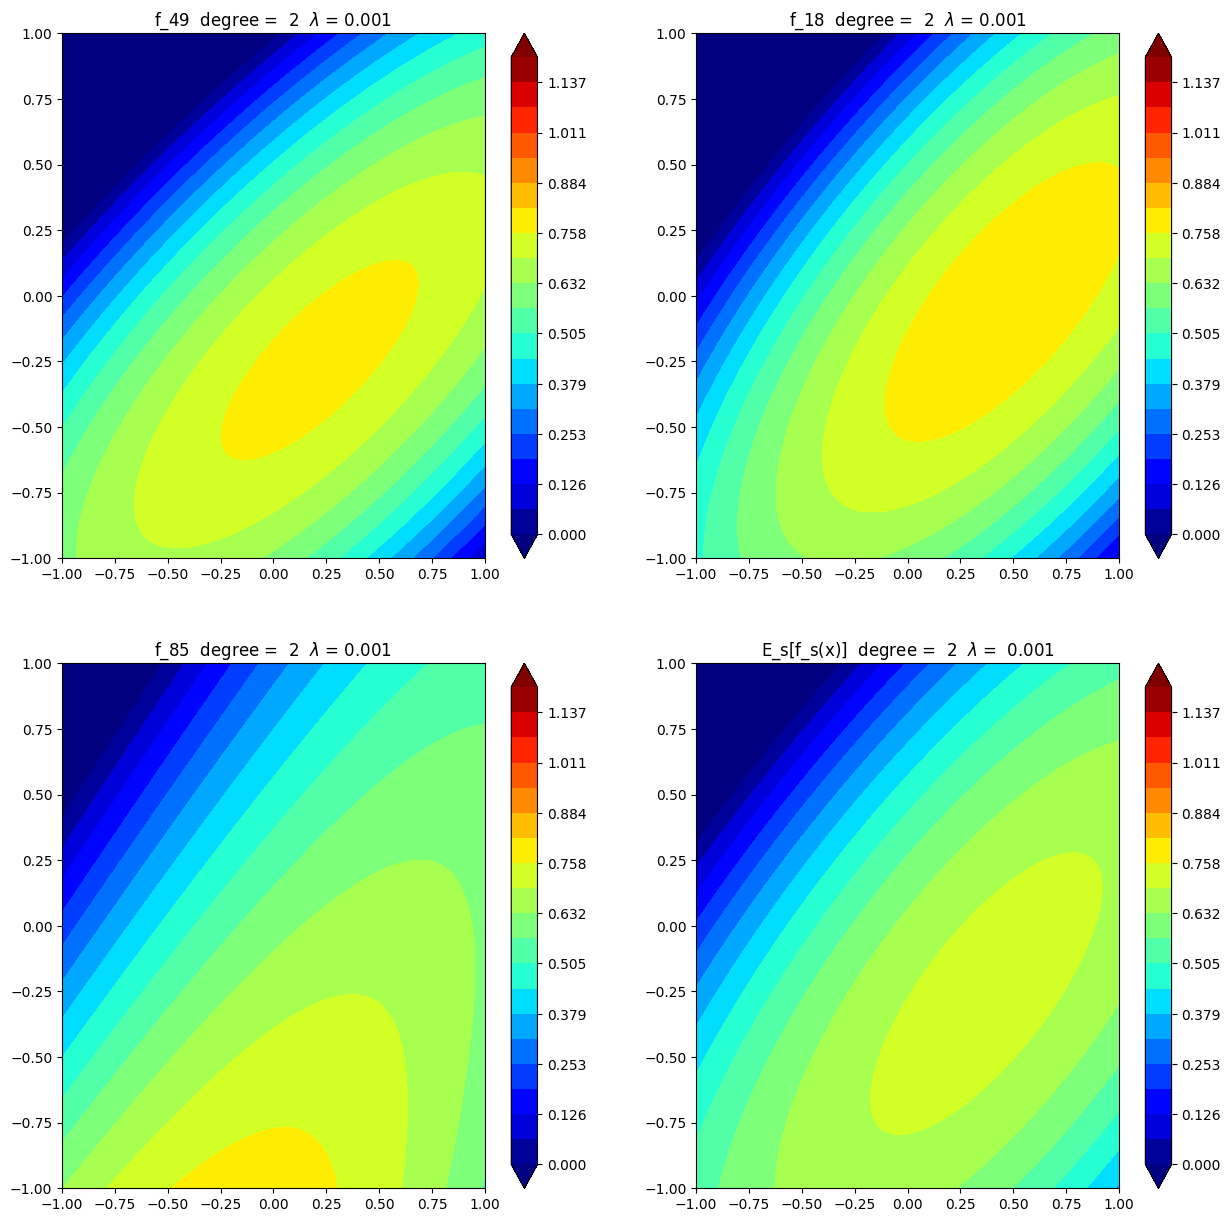

Degree= 2 lambda= 0.001
Bias = 0.31202598724572705
Variance = 0.008958223970886138
MSE = 0.31528553225141565


<Figure size 640x480 with 0 Axes>

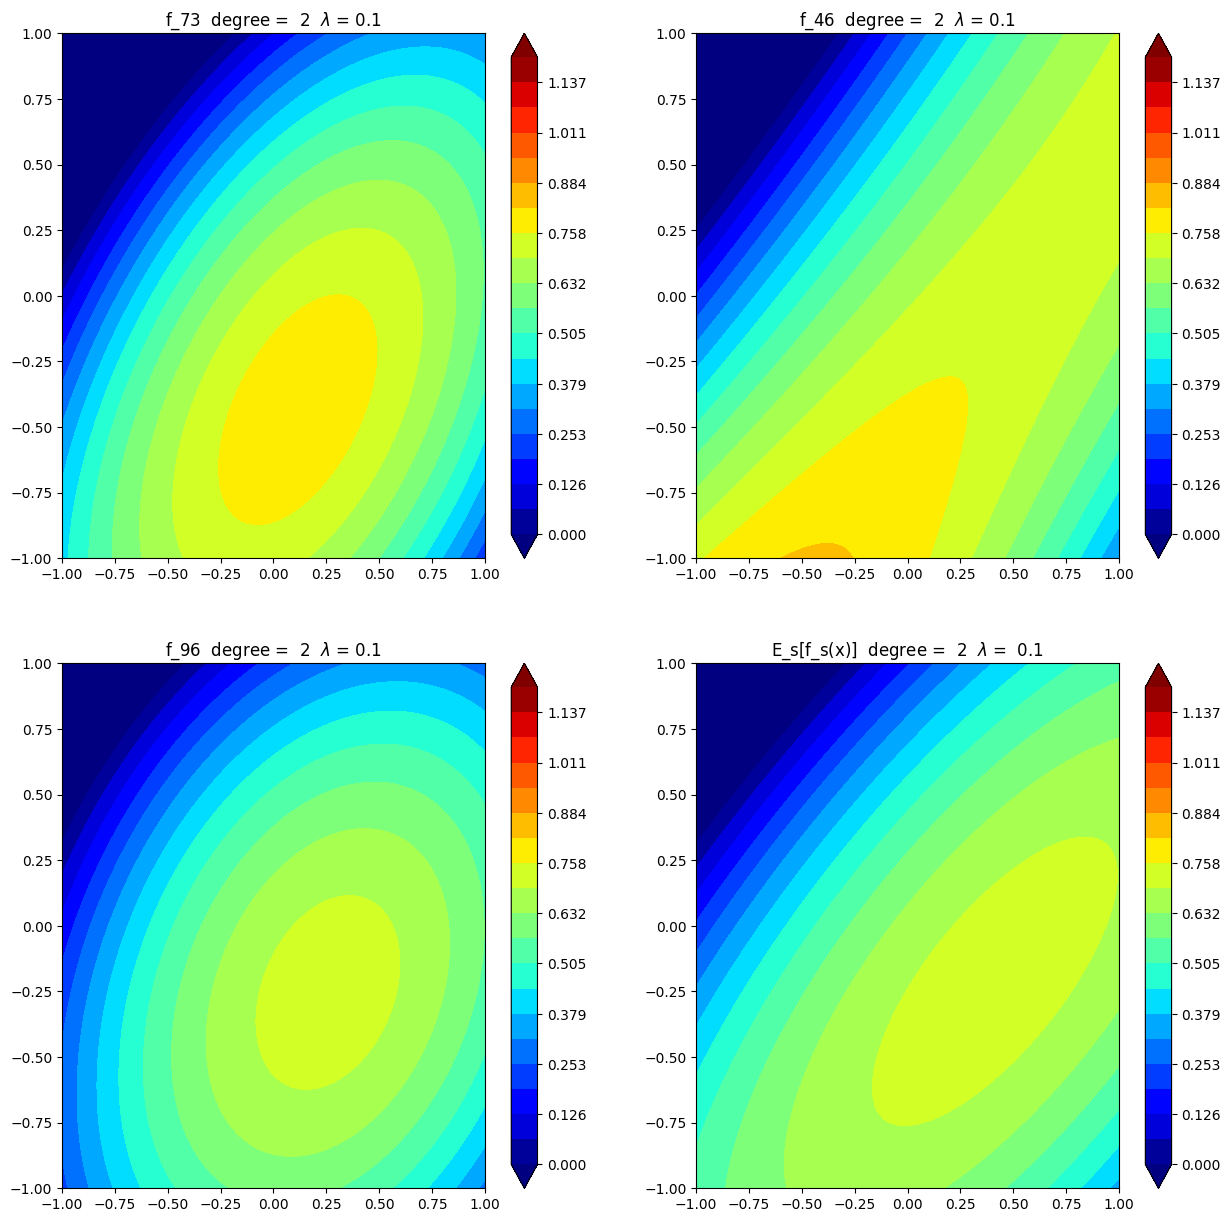

Degree= 2 lambda= 0.1
Bias = 0.3118638531861433
Variance = 0.008874868395877297
MSE = 0.3147612018744521


<Figure size 640x480 with 0 Axes>

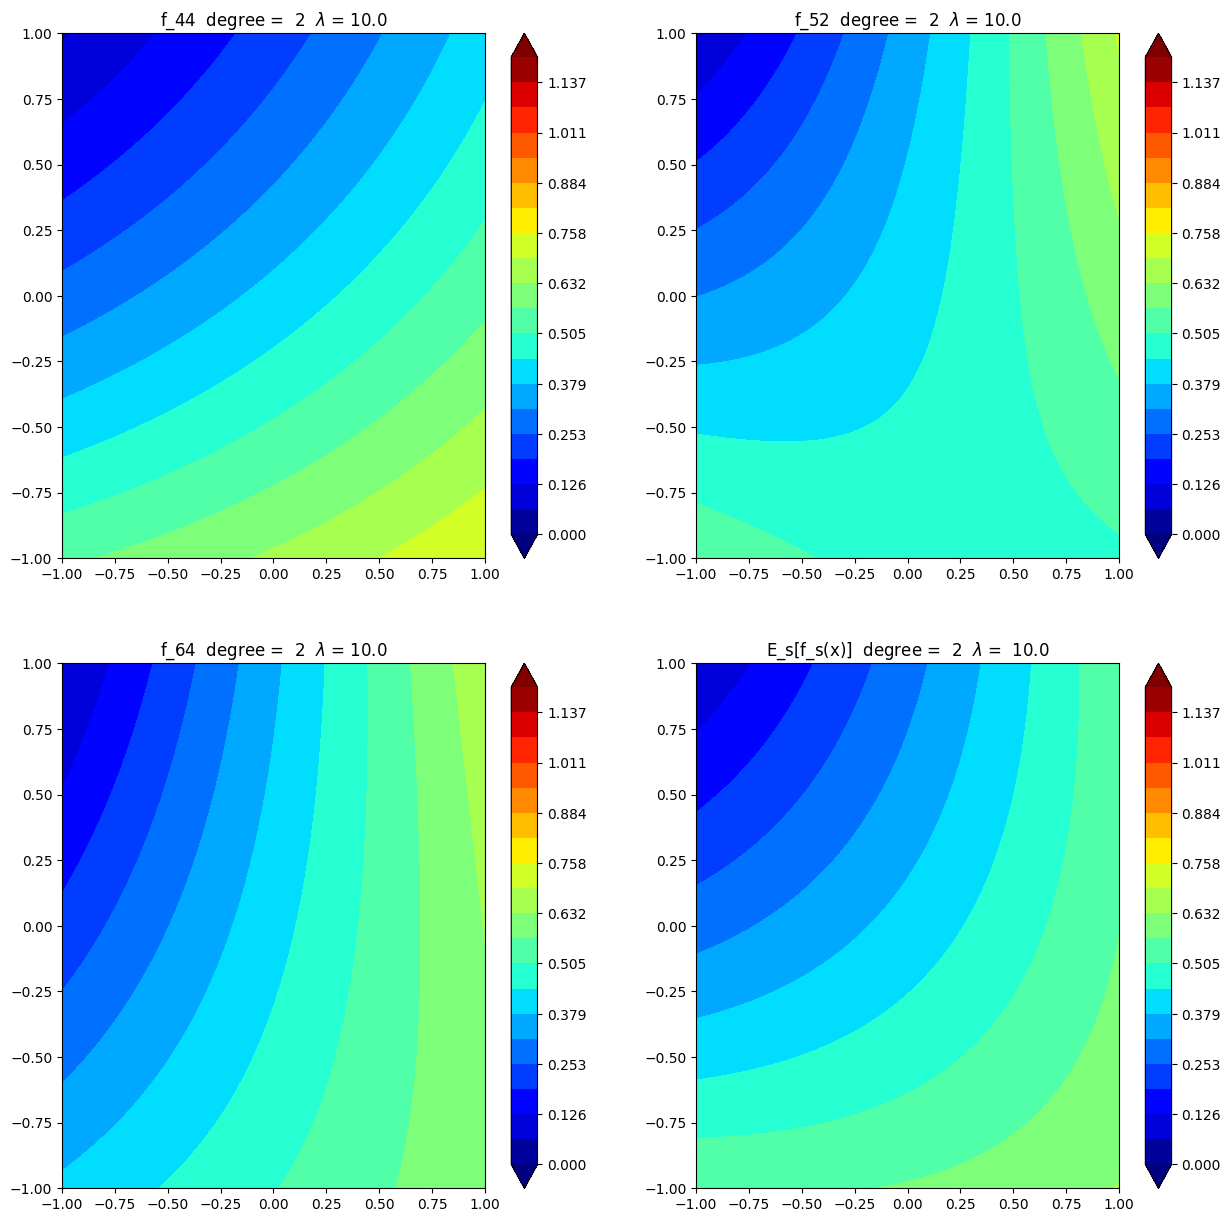

Degree= 2 lambda= 10.0
Bias = 0.19208969661045341
Variance = 0.0038029850703313467
MSE = 0.19224821042771092


<Figure size 640x480 with 0 Axes>

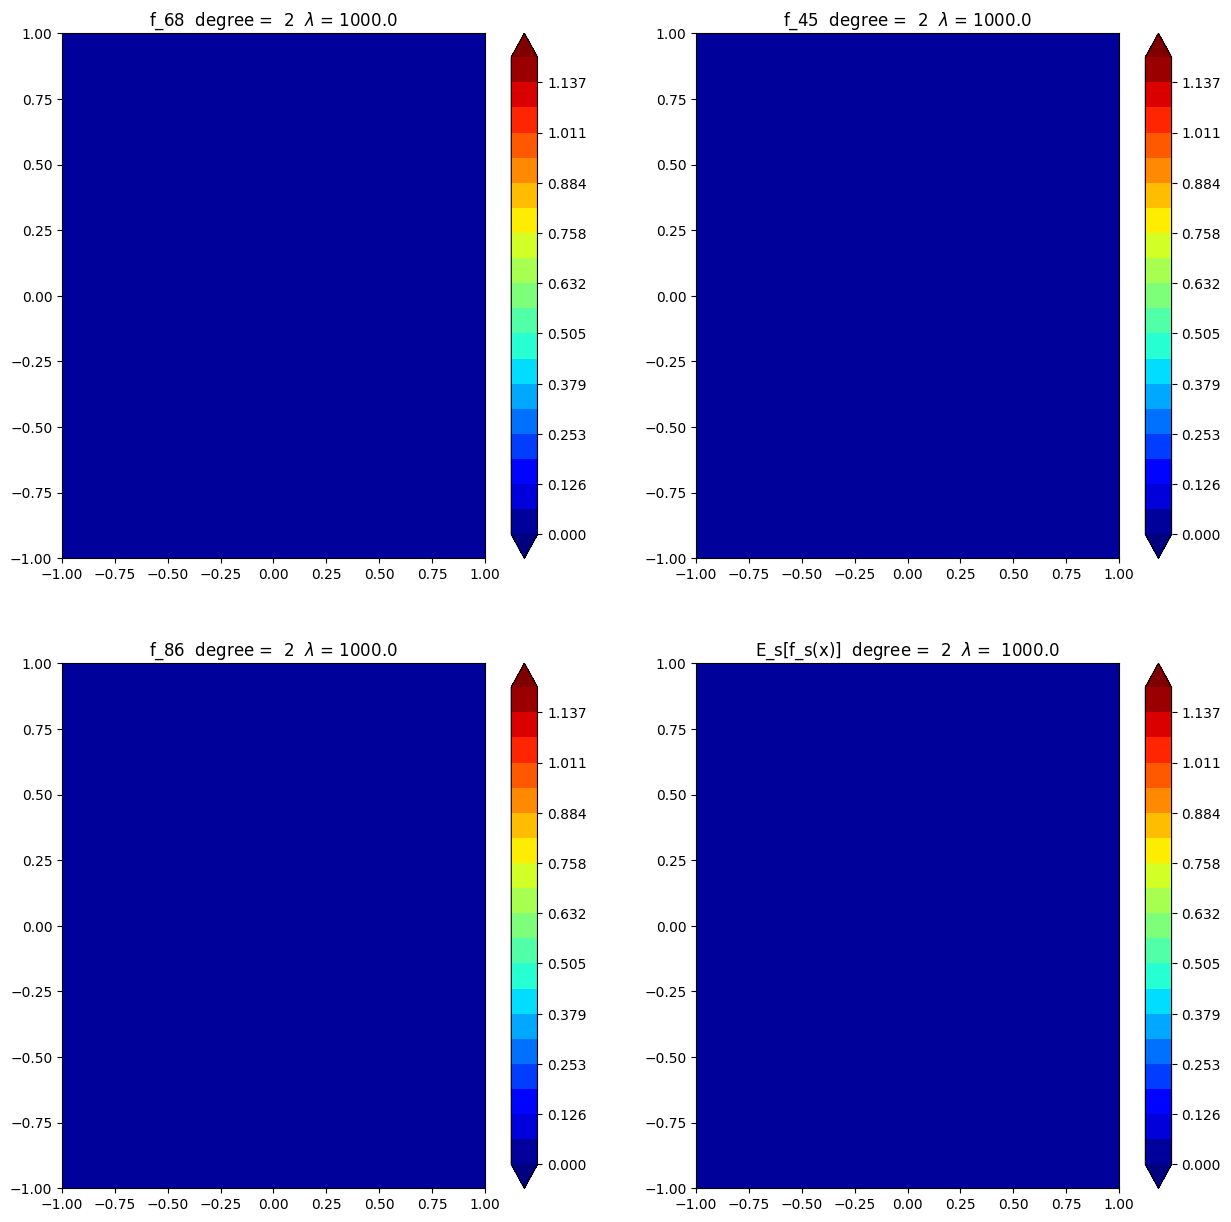

Degree= 2 lambda= 1000.0
Bias = 0.000785655419193222
Variance = 1.447817278125786e-05
MSE = 0.0007858464567154892


<Figure size 640x480 with 0 Axes>

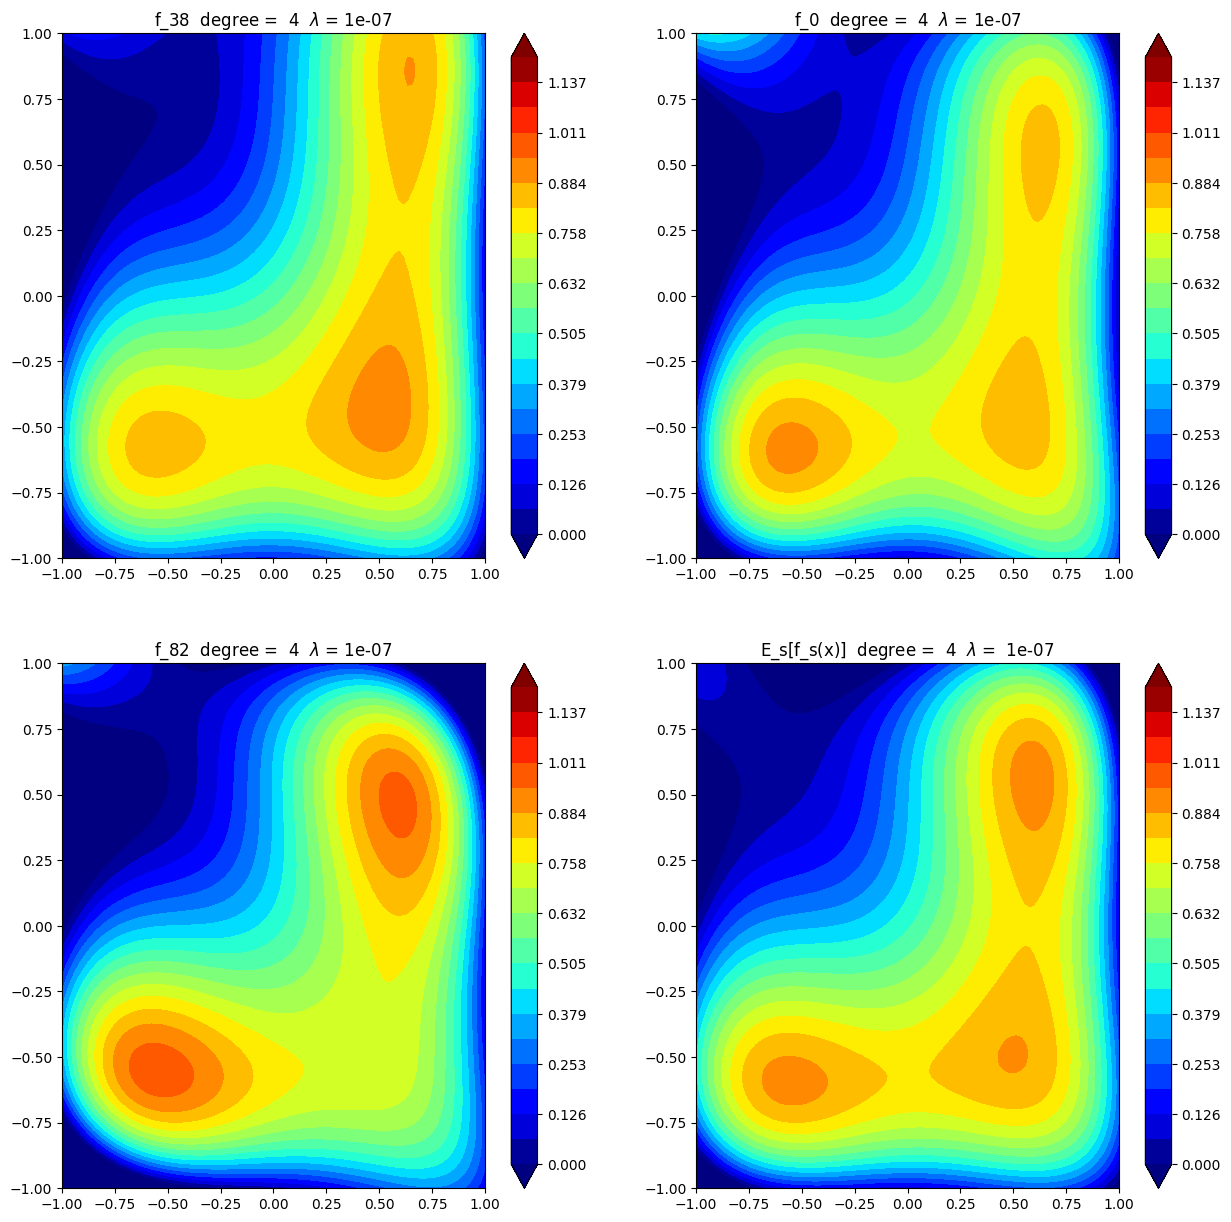

Degree= 4 lambda= 1e-07
Bias = 0.3329149873763247
Variance = 0.009844254693288632
MSE = 0.3359675637343017


<Figure size 640x480 with 0 Axes>

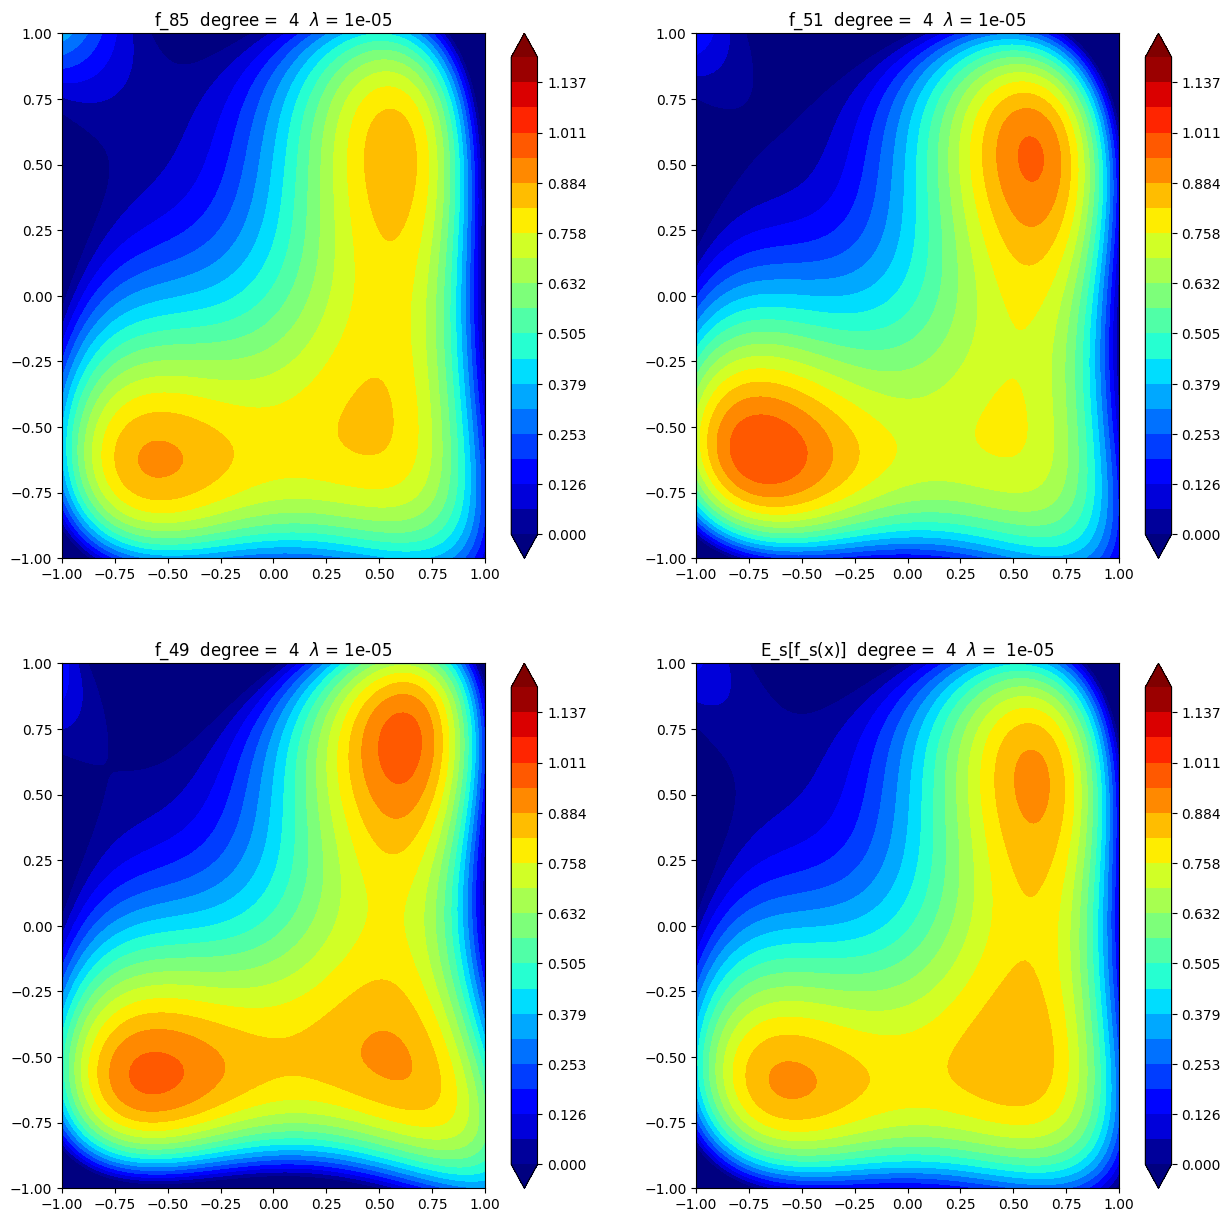

Degree= 4 lambda= 1e-05
Bias = 0.3226145079311574
Variance = 0.011185082654684032
MSE = 0.326760498895643


<Figure size 640x480 with 0 Axes>

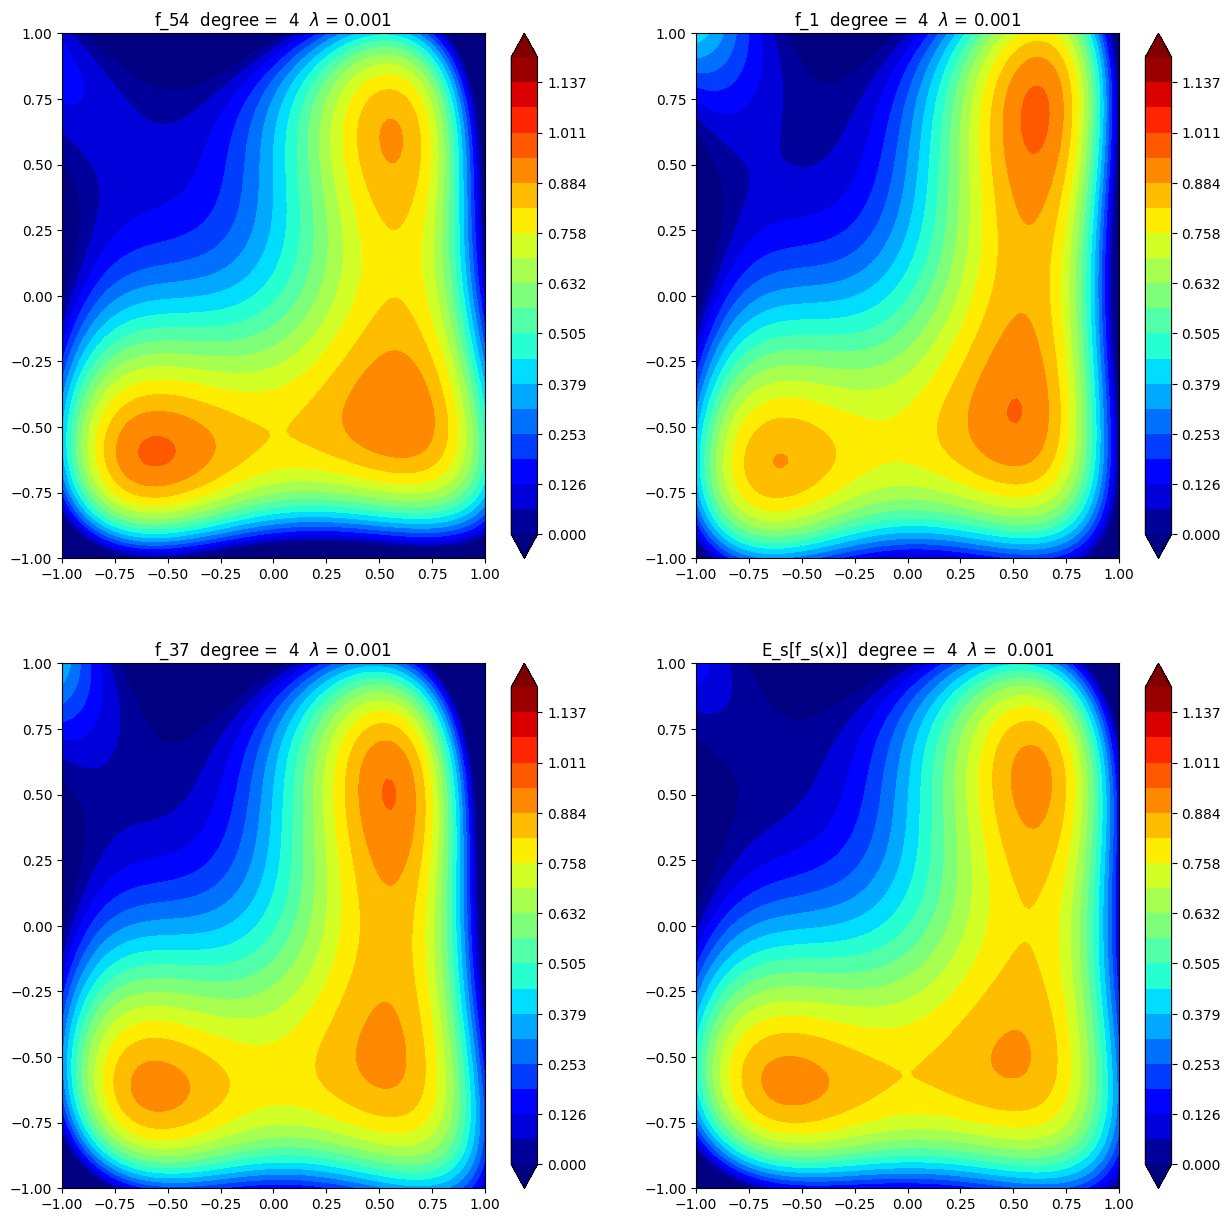

Degree= 4 lambda= 0.001
Bias = 0.3386704154136634
Variance = 0.009544809360204253
MSE = 0.34165539134329914


<Figure size 640x480 with 0 Axes>

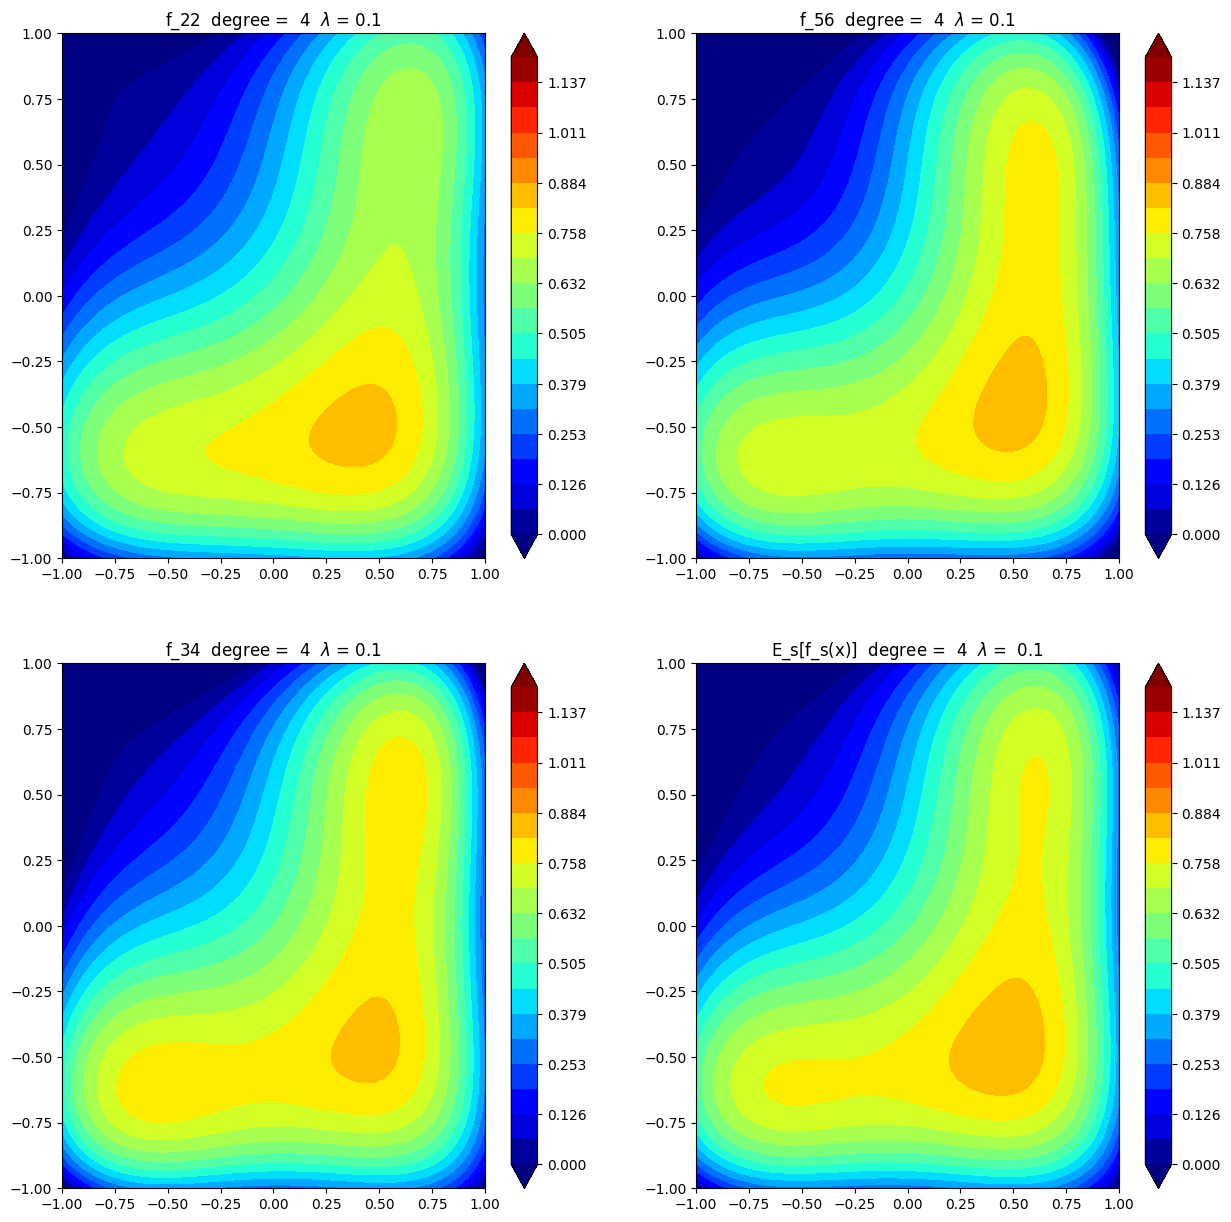

Degree= 4 lambda= 0.1
Bias = 0.31213942218343166
Variance = 0.006890601194890574
MSE = 0.3126405731623103


<Figure size 640x480 with 0 Axes>

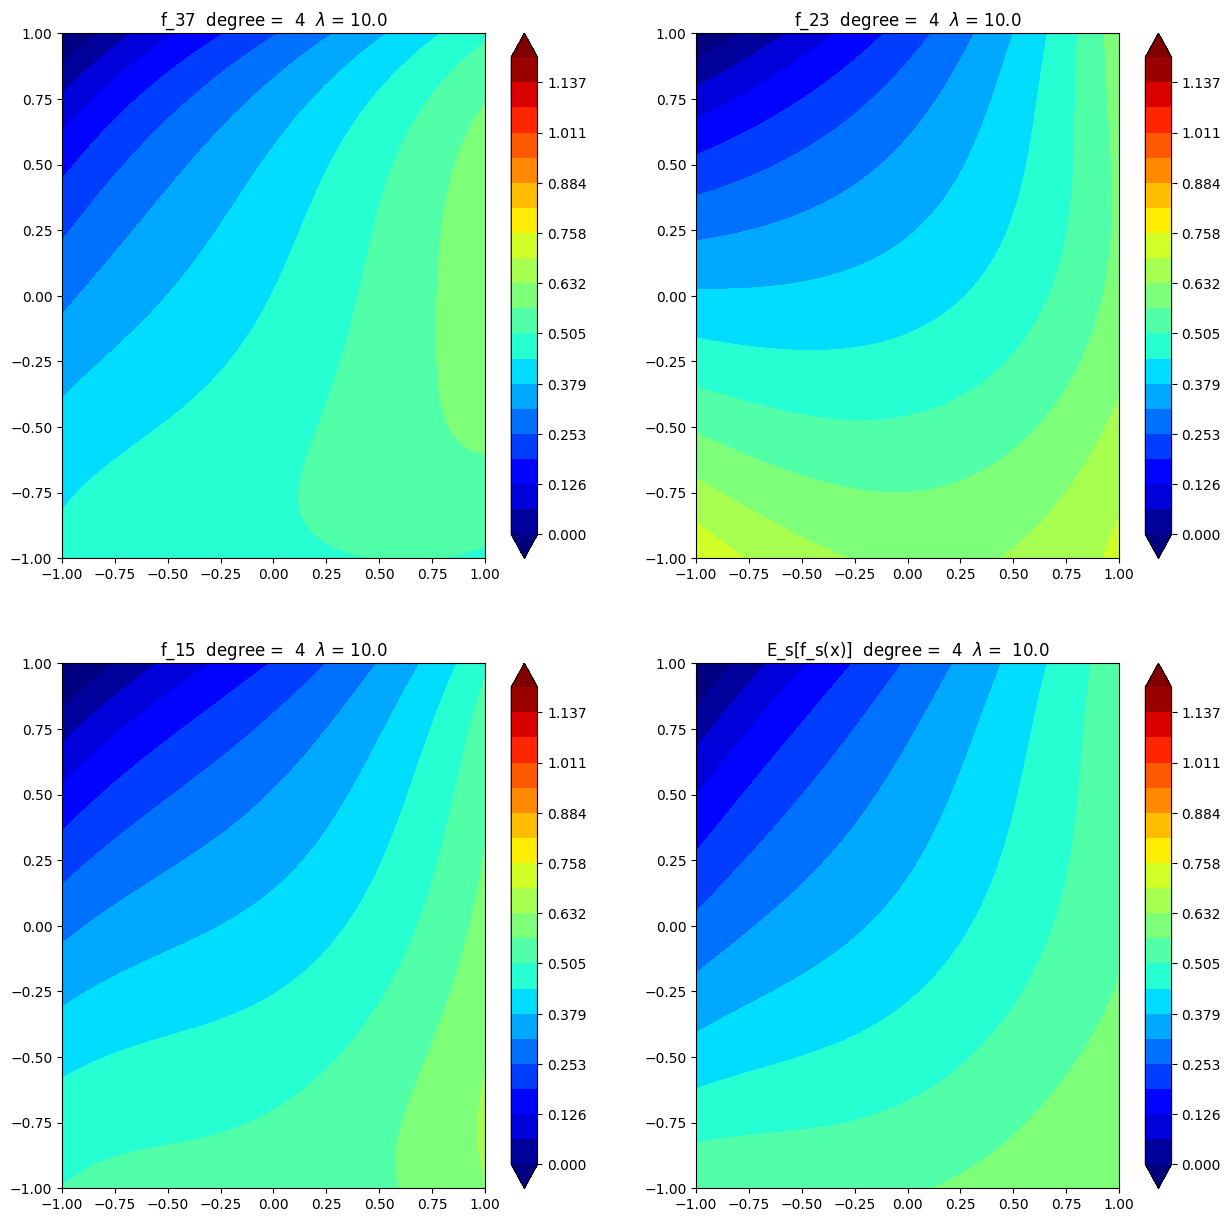

Degree= 4 lambda= 10.0
Bias = 0.1875955572177531
Variance = 0.003824638199877432
MSE = 0.18748626923051462


<Figure size 640x480 with 0 Axes>

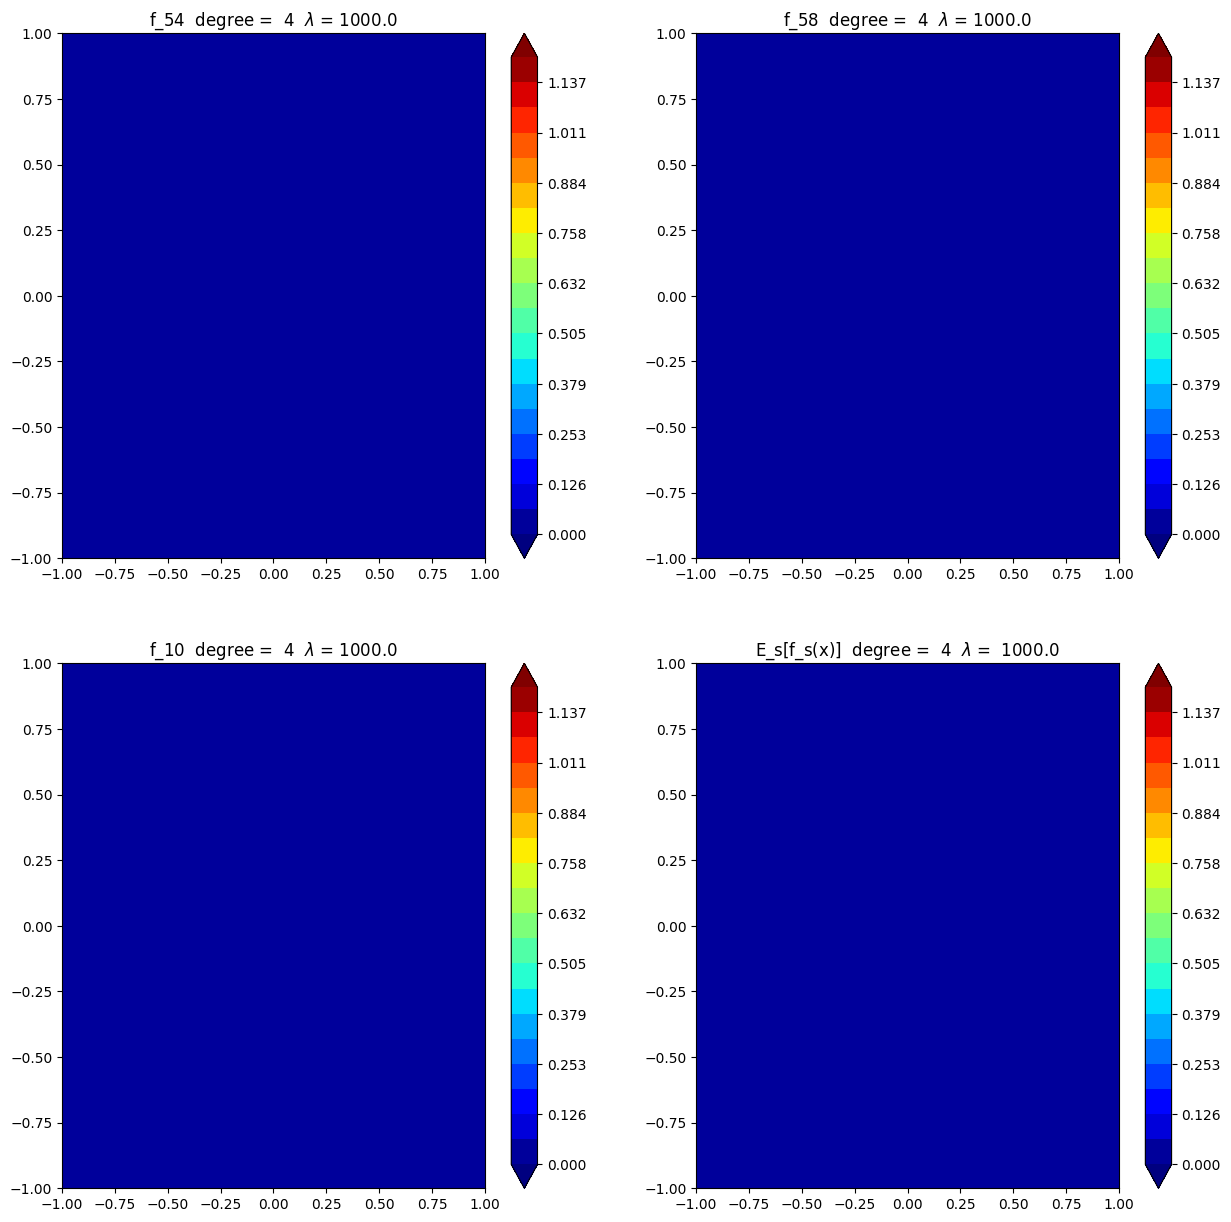

Degree= 4 lambda= 1000.0
Bias = 0.0009214279663490781
Variance = 1.8771199808747337e-05
MSE = 0.0009222562884670218


<Figure size 640x480 with 0 Axes>

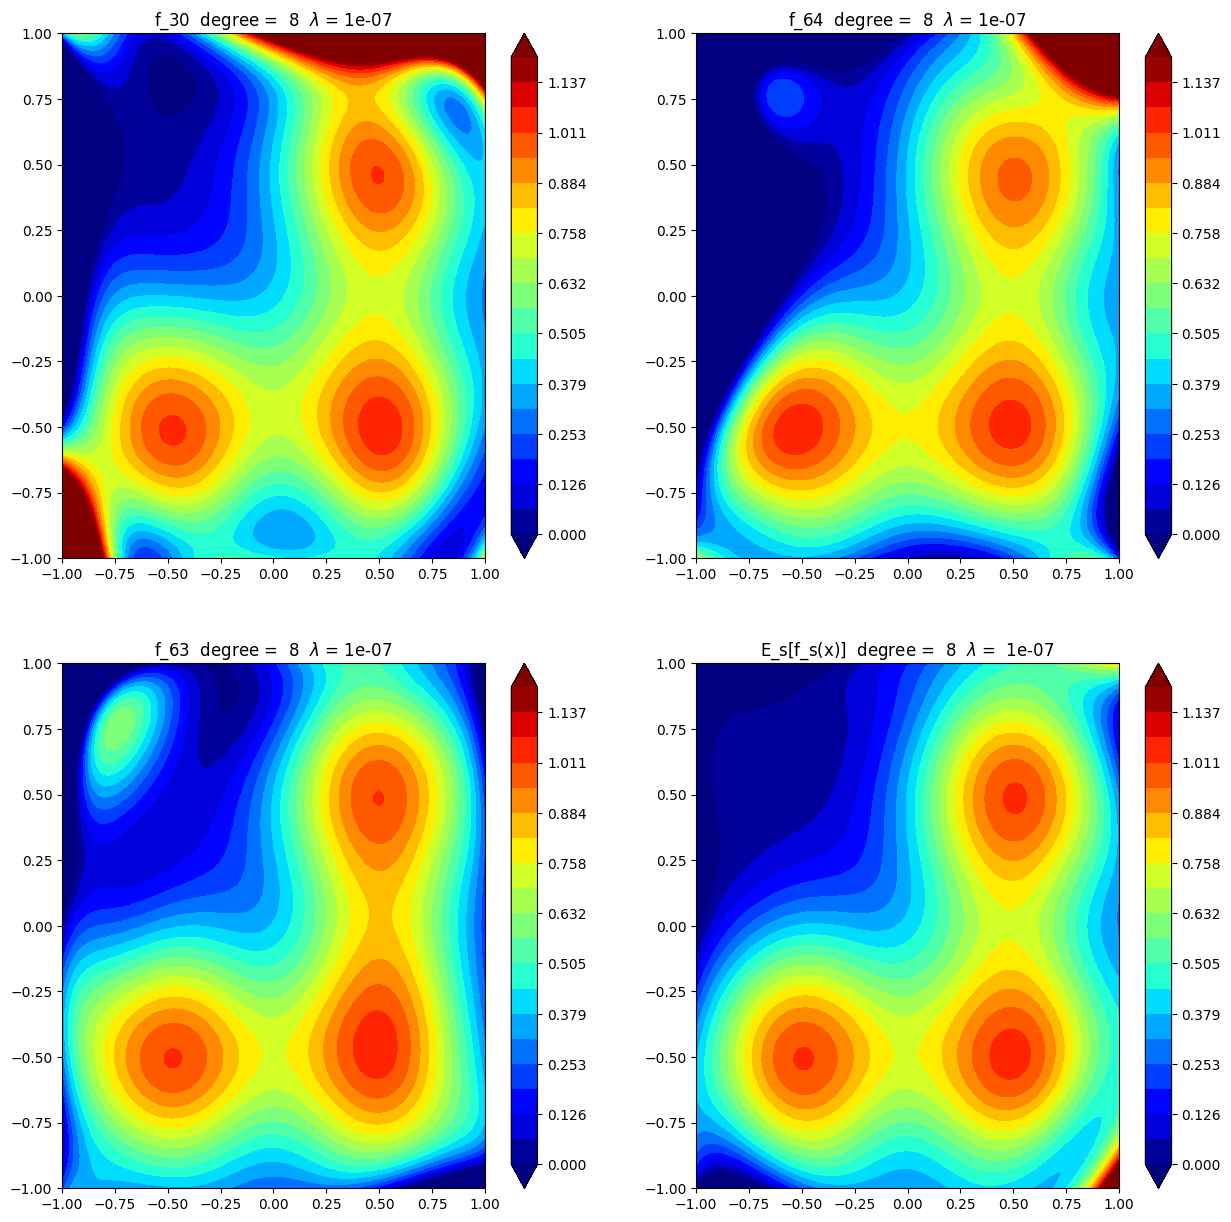

Degree= 8 lambda= 1e-07
Bias = 0.3469381916866407
Variance = 0.17146489826825276
MSE = 0.5120378915112286


<Figure size 640x480 with 0 Axes>

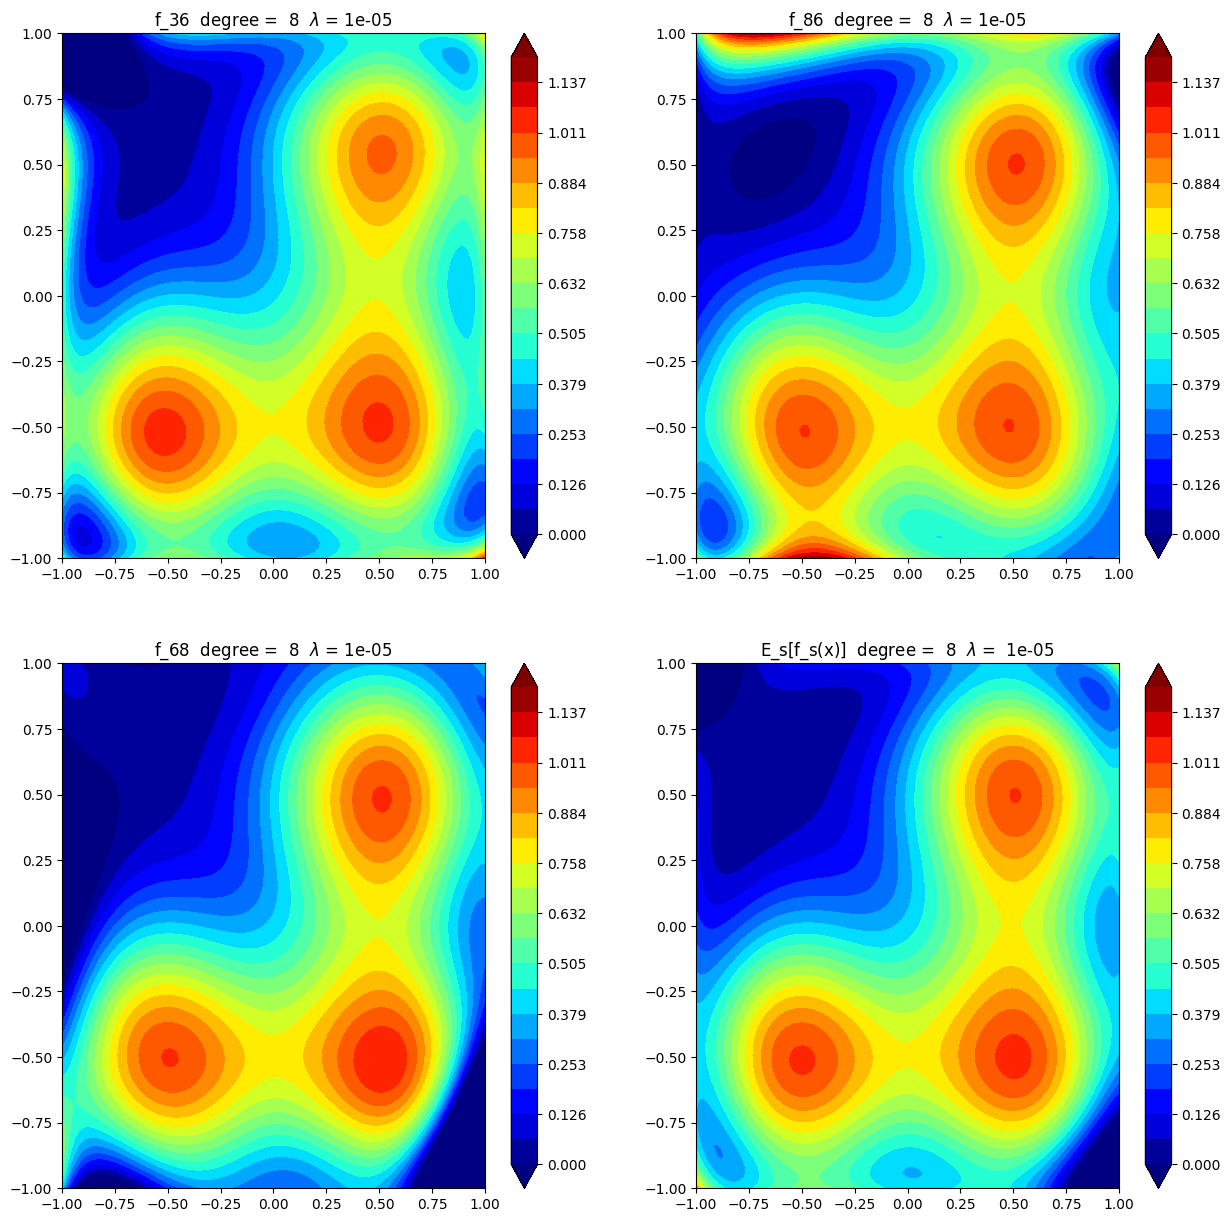

Degree= 8 lambda= 1e-05
Bias = 0.3340074311665964
Variance = 0.053013399171731514
MSE = 0.3802663327815908


<Figure size 640x480 with 0 Axes>

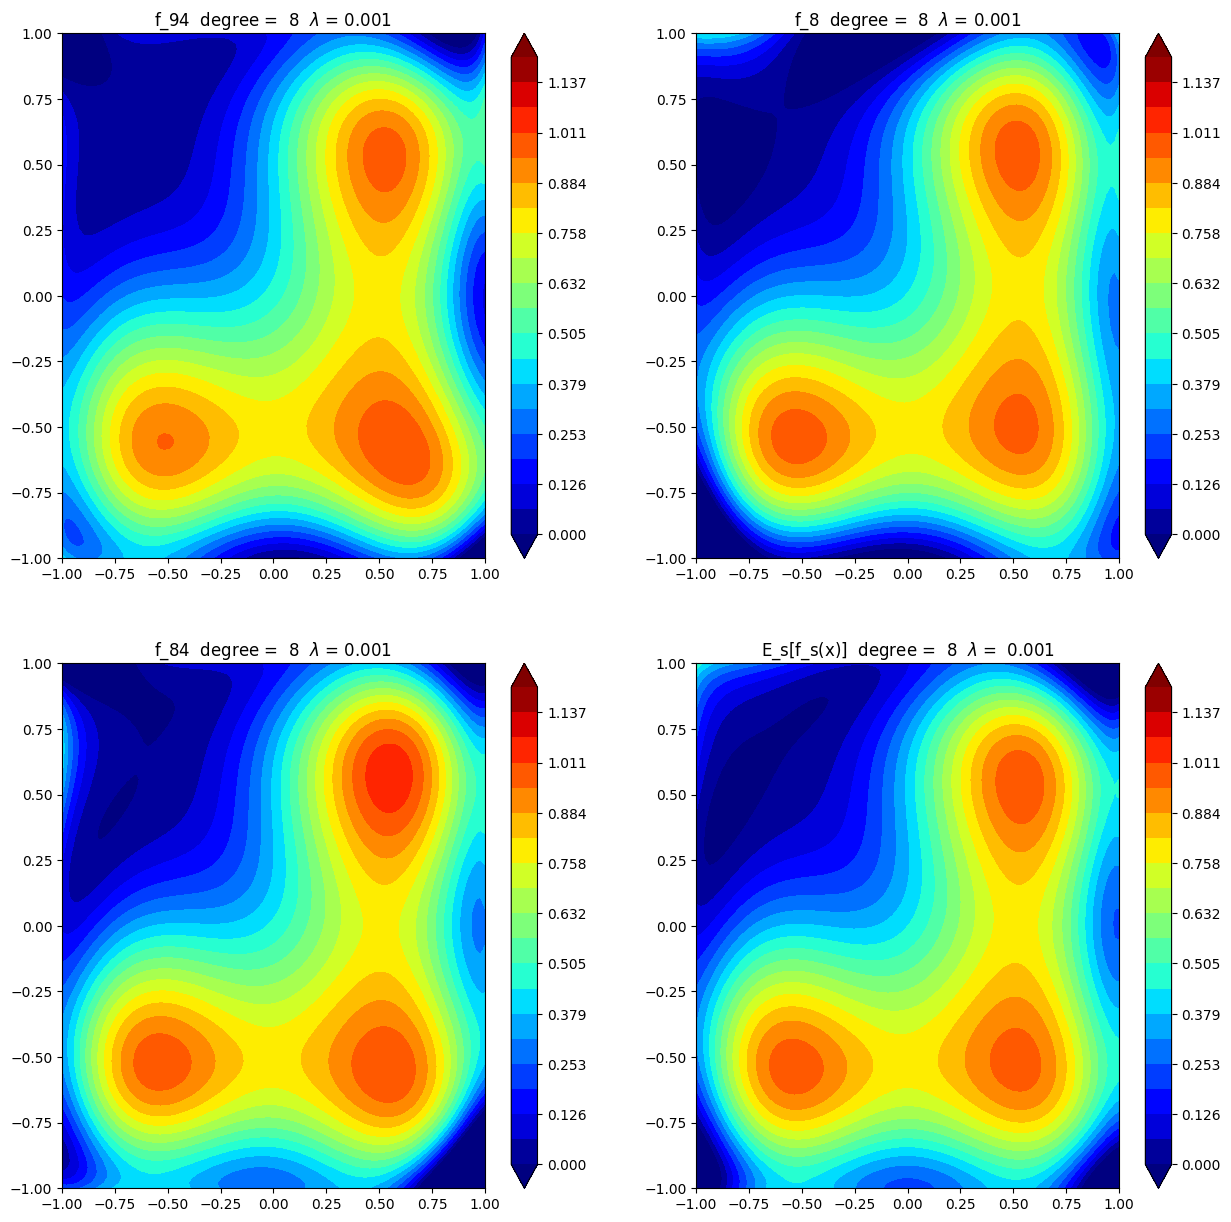

Degree= 8 lambda= 0.001
Bias = 0.3354992531639542
Variance = 0.02108480695565594
MSE = 0.350014041255051


<Figure size 640x480 with 0 Axes>

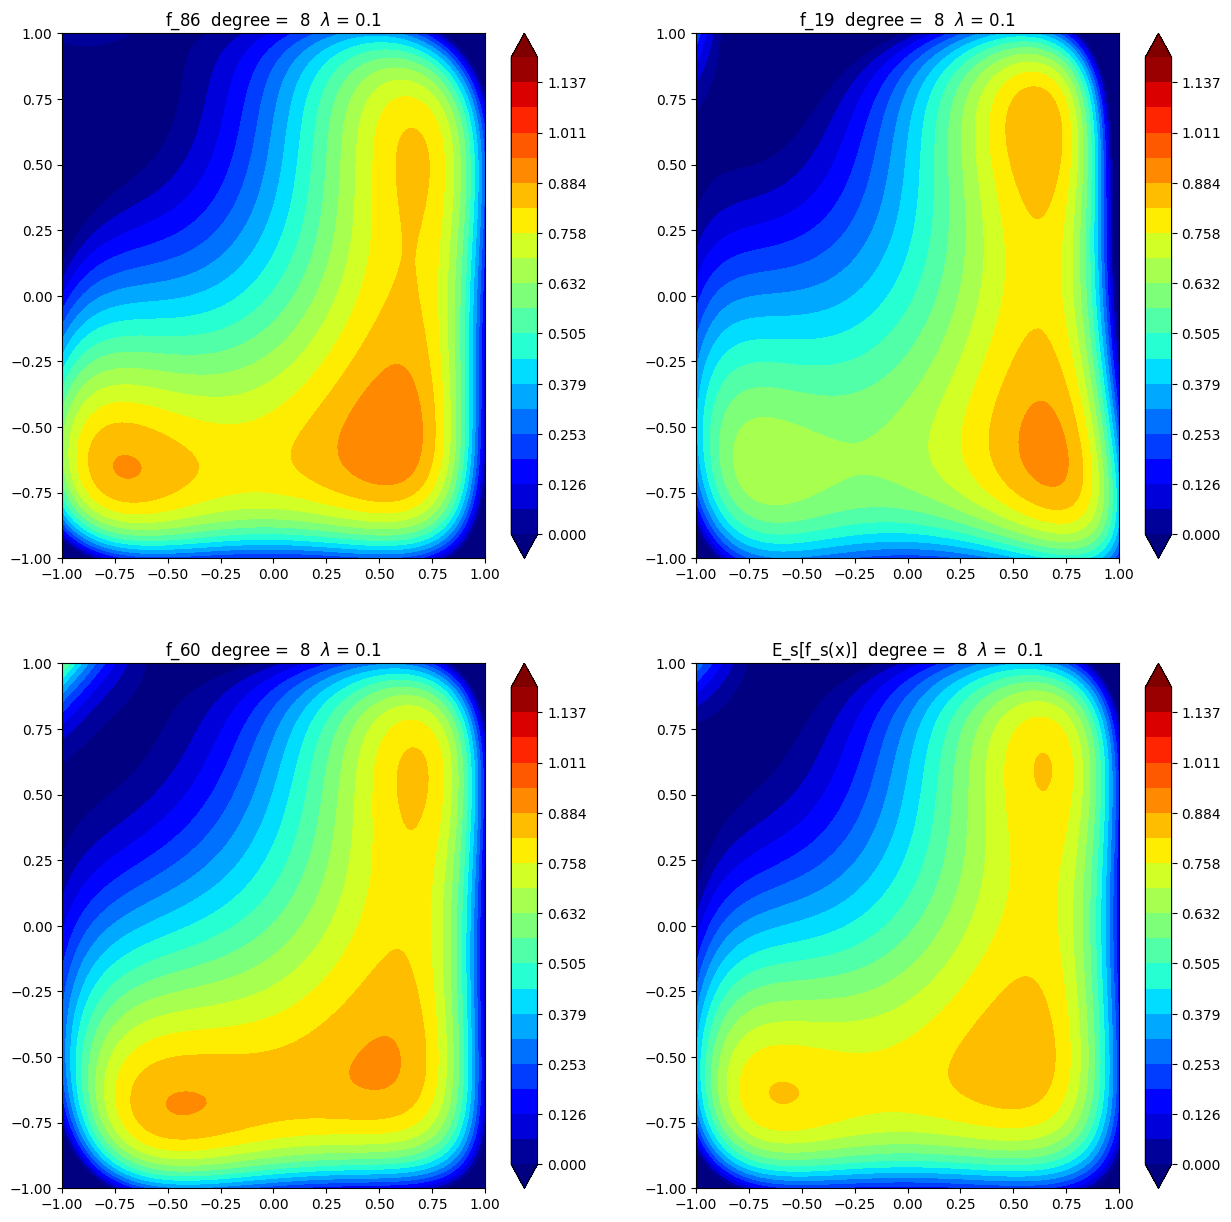

Degree= 8 lambda= 0.1
Bias = 0.3188842089953492
Variance = 0.008390711093449306
MSE = 0.32099729651227066


<Figure size 640x480 with 0 Axes>

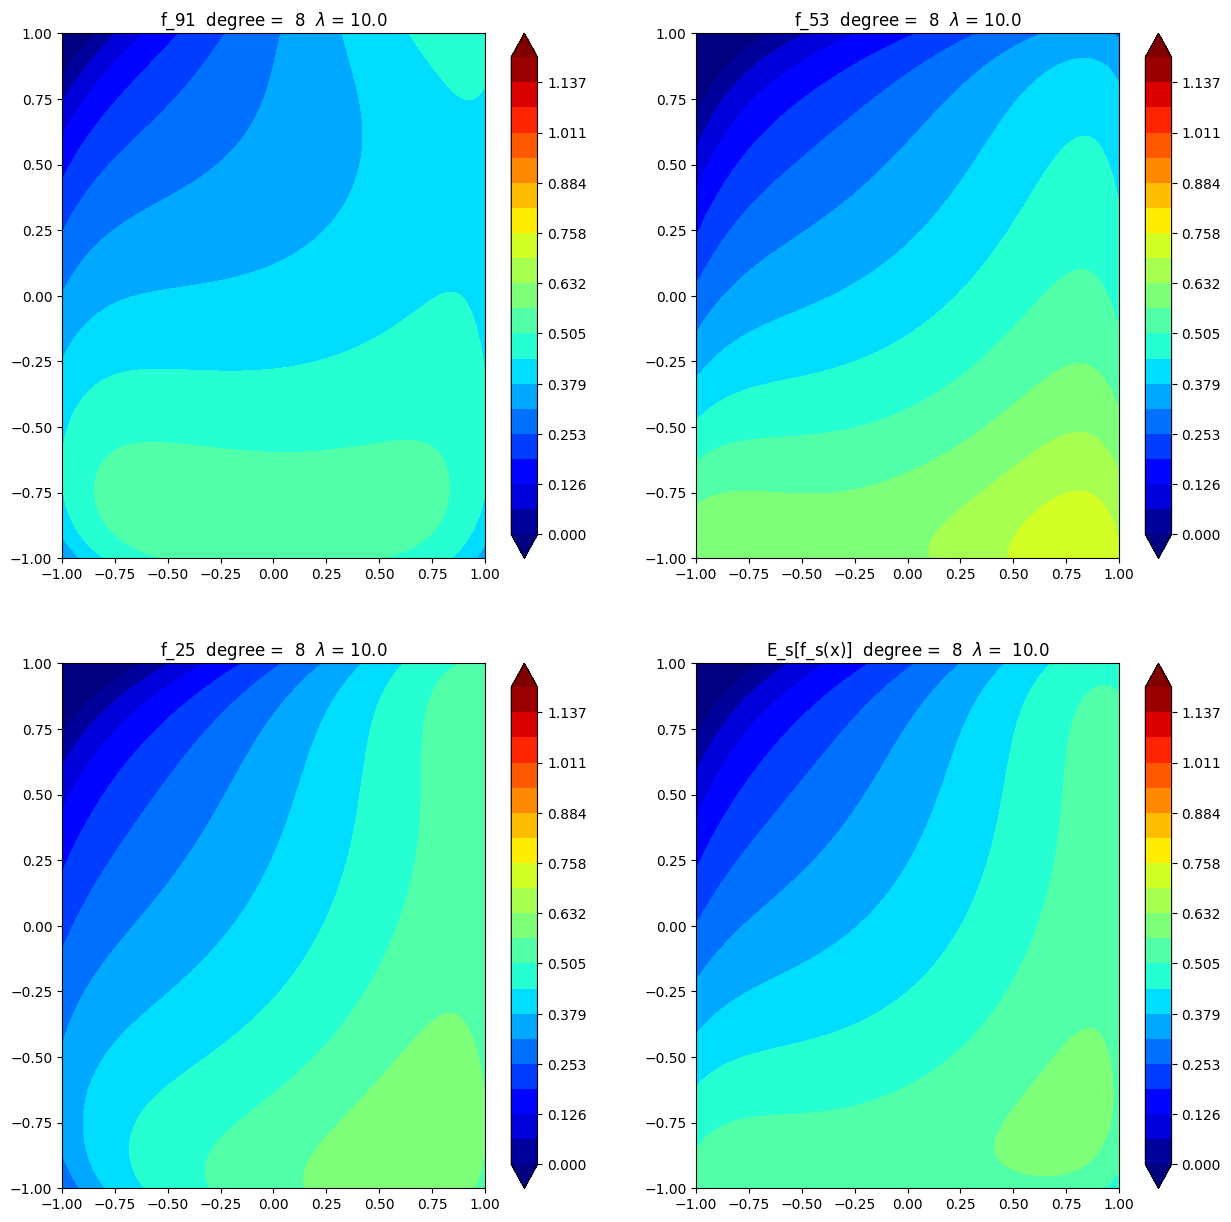

Degree= 8 lambda= 10.0
Bias = 0.1926703815202197
Variance = 0.0041582684307257855
MSE = 0.19265631303877429


<Figure size 640x480 with 0 Axes>

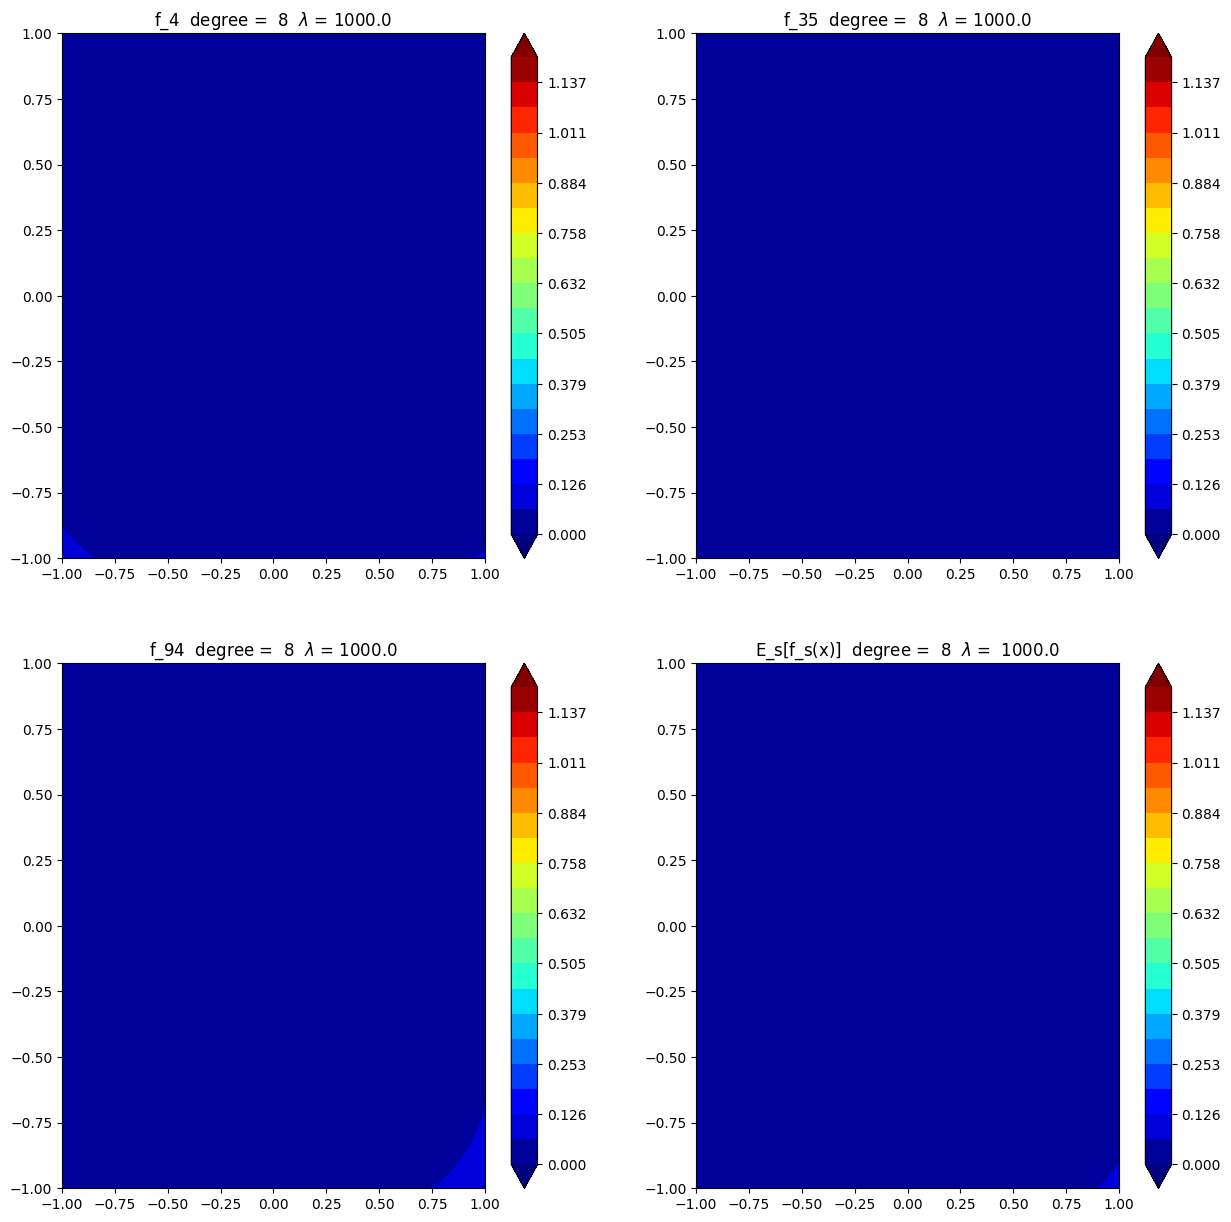

Degree= 8 lambda= 1000.0
Bias = 0.0009860002978260682
Variance = 2.5882667263686457e-05
MSE = 0.000991843783851745


<Figure size 640x480 with 0 Axes>

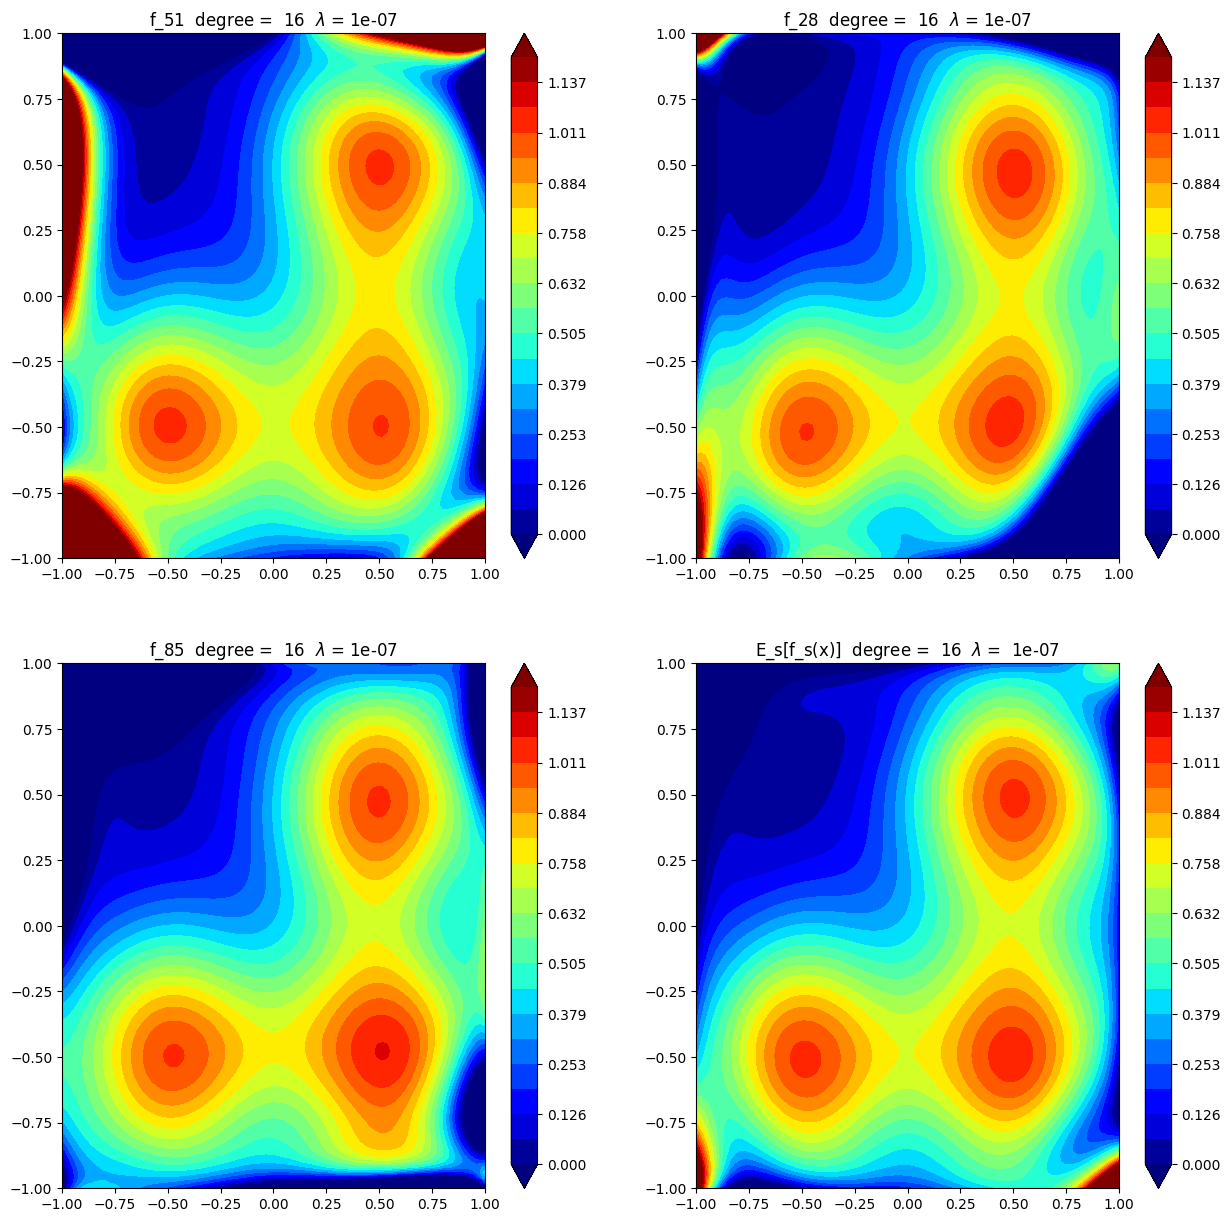

Degree= 16 lambda= 1e-07
Bias = 0.3569042510646869
Variance = 0.3391718560269175
MSE = 0.6884228087779903


<Figure size 640x480 with 0 Axes>

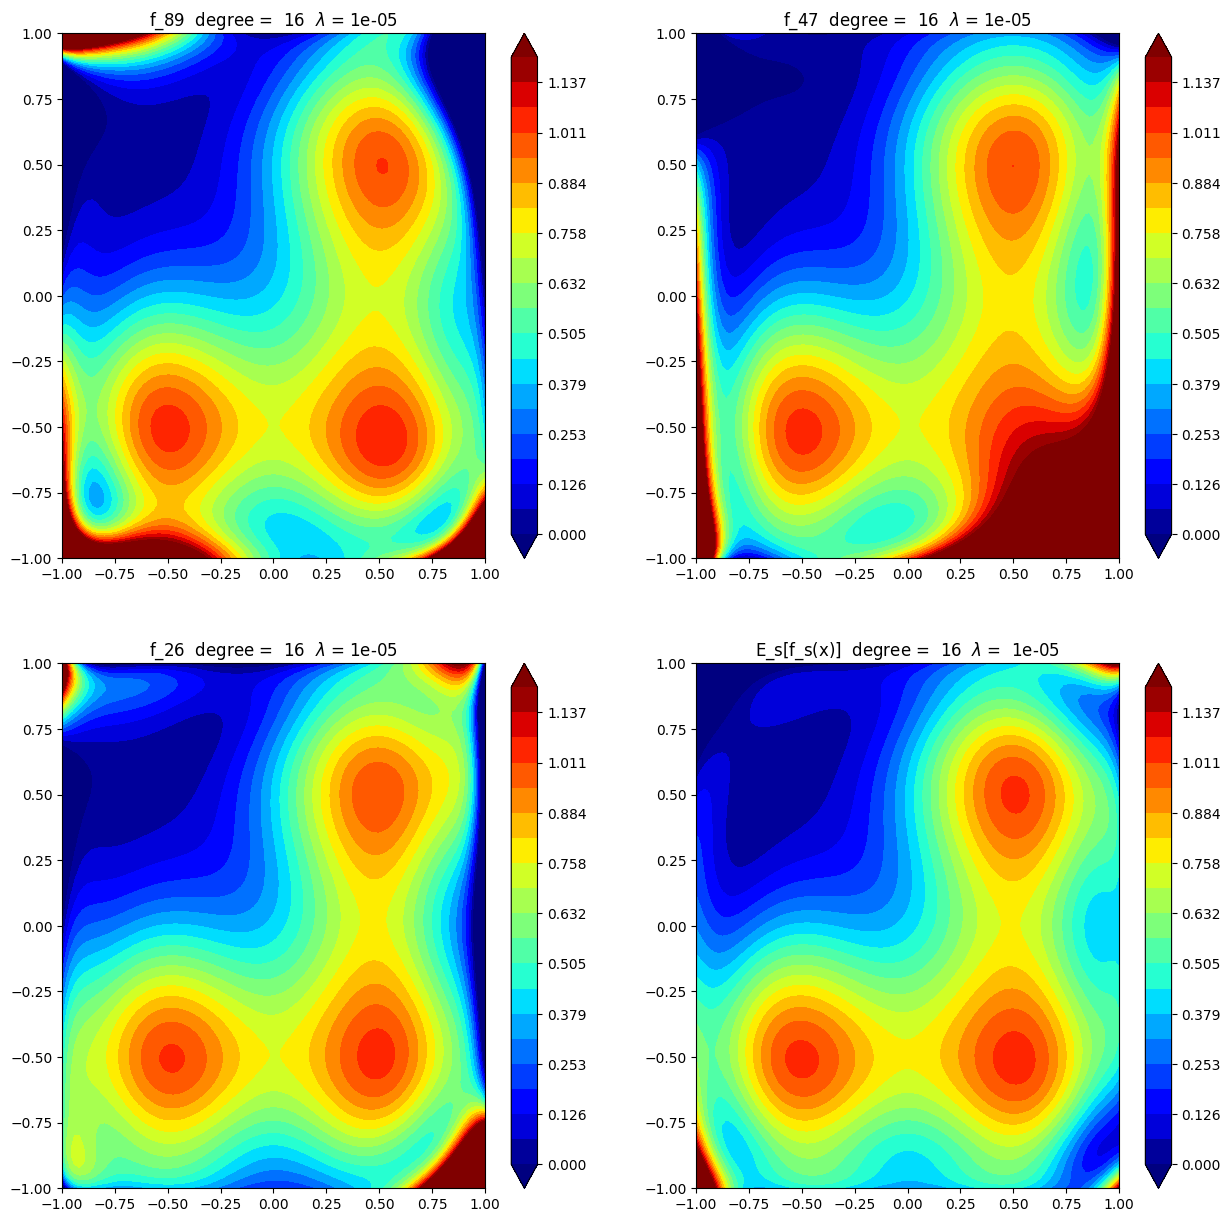

Degree= 16 lambda= 1e-05
Bias = 0.3602917032761981
Variance = 0.14757111460182104
MSE = 0.5004509856732327


<Figure size 640x480 with 0 Axes>

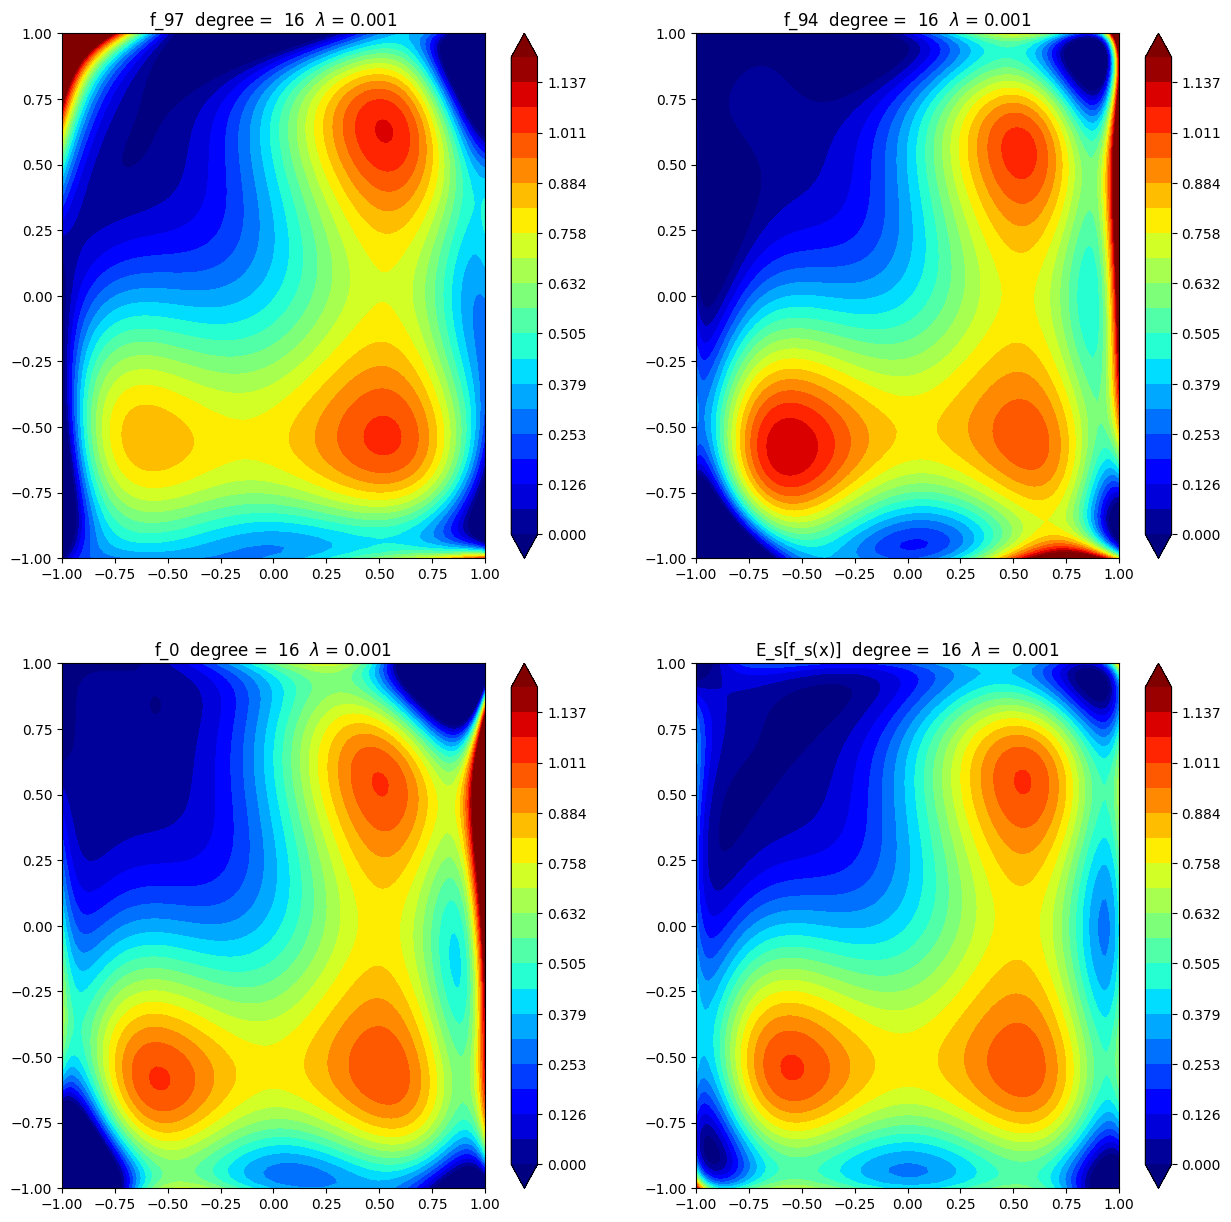

Degree= 16 lambda= 0.001
Bias = 0.33548933461024316
Variance = 0.05558844628251213
MSE = 0.3843127747442039


<Figure size 640x480 with 0 Axes>

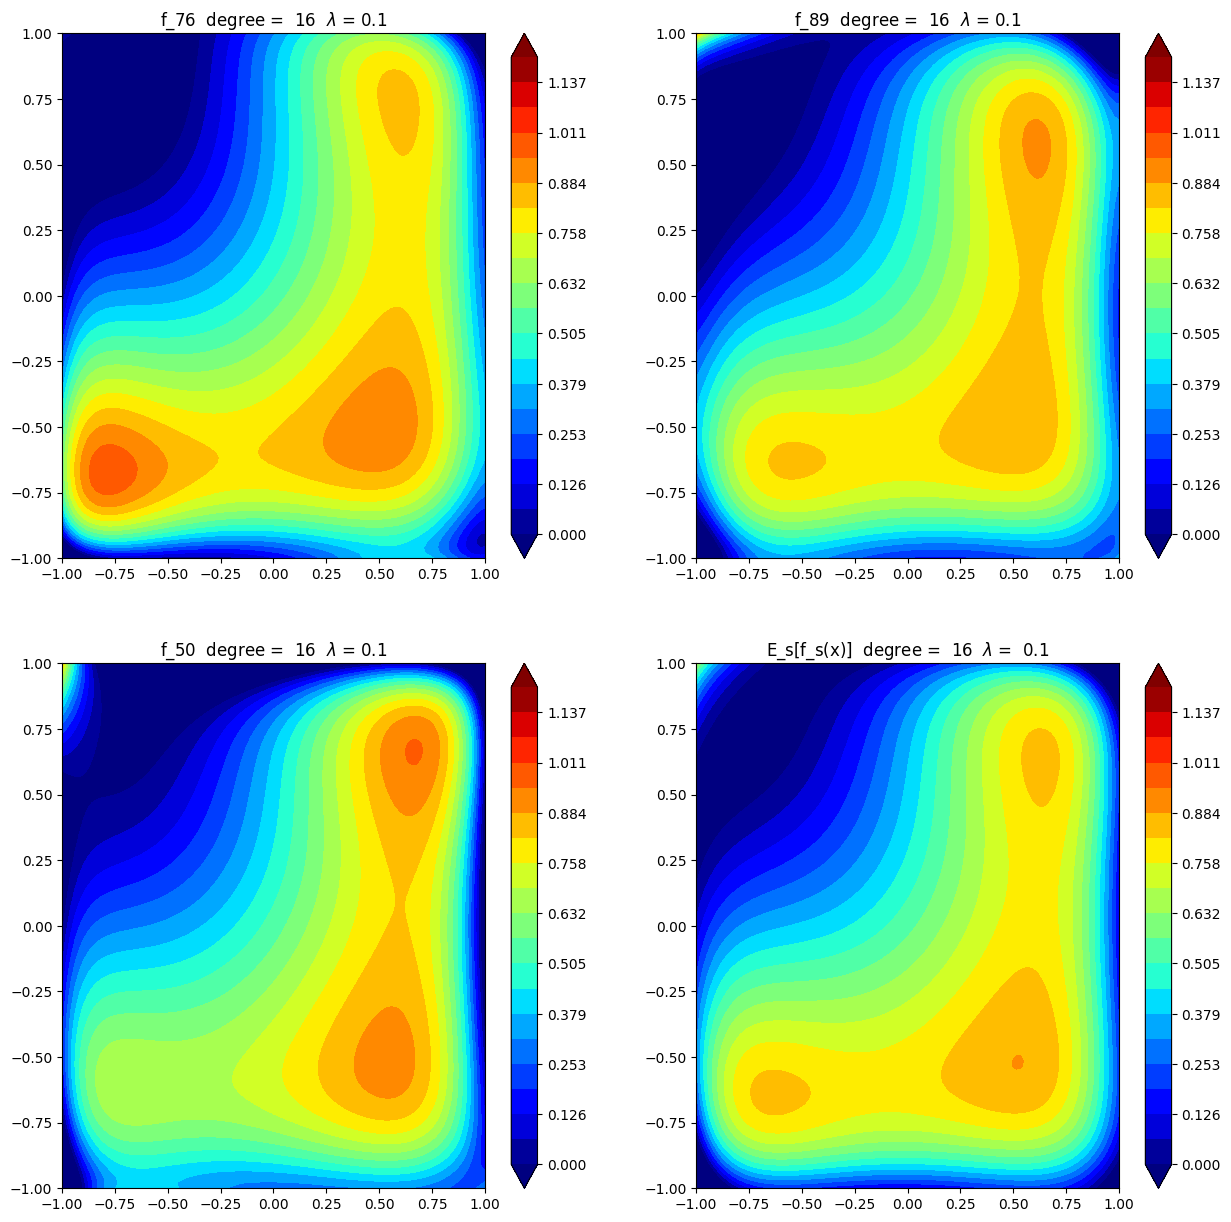

Degree= 16 lambda= 0.1
Bias = 0.32495176682278887
Variance = 0.011945002737991327
MSE = 0.33016592563209296


<Figure size 640x480 with 0 Axes>

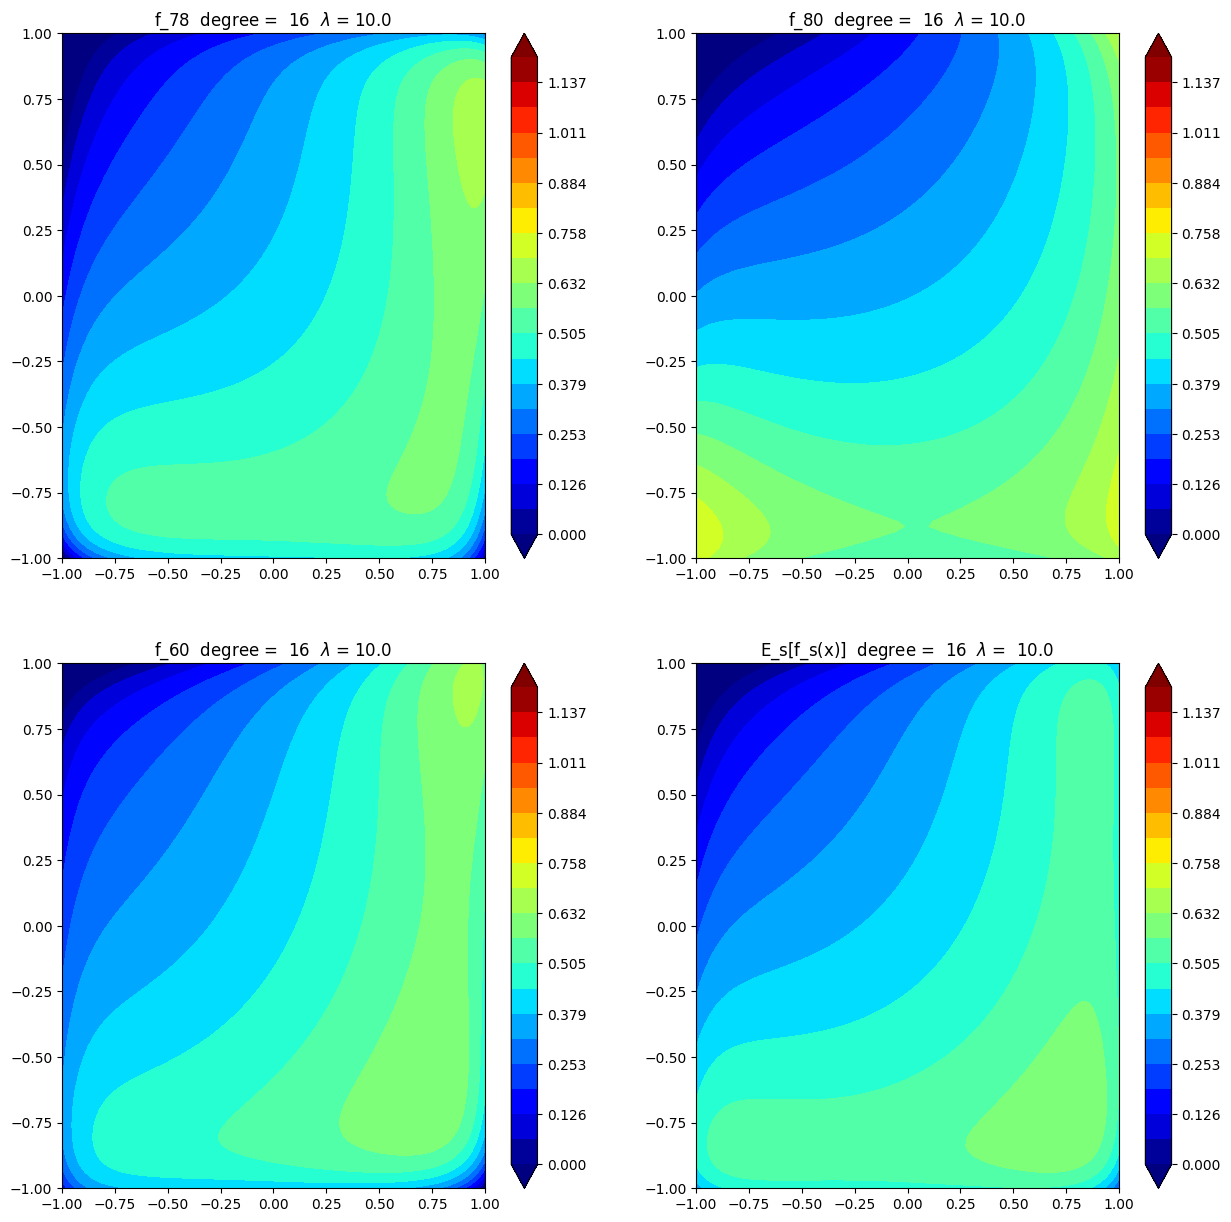

Degree= 16 lambda= 10.0
Bias = 0.1945597764308968
Variance = 0.004657916381926488
MSE = 0.19541505880851215


<Figure size 640x480 with 0 Axes>

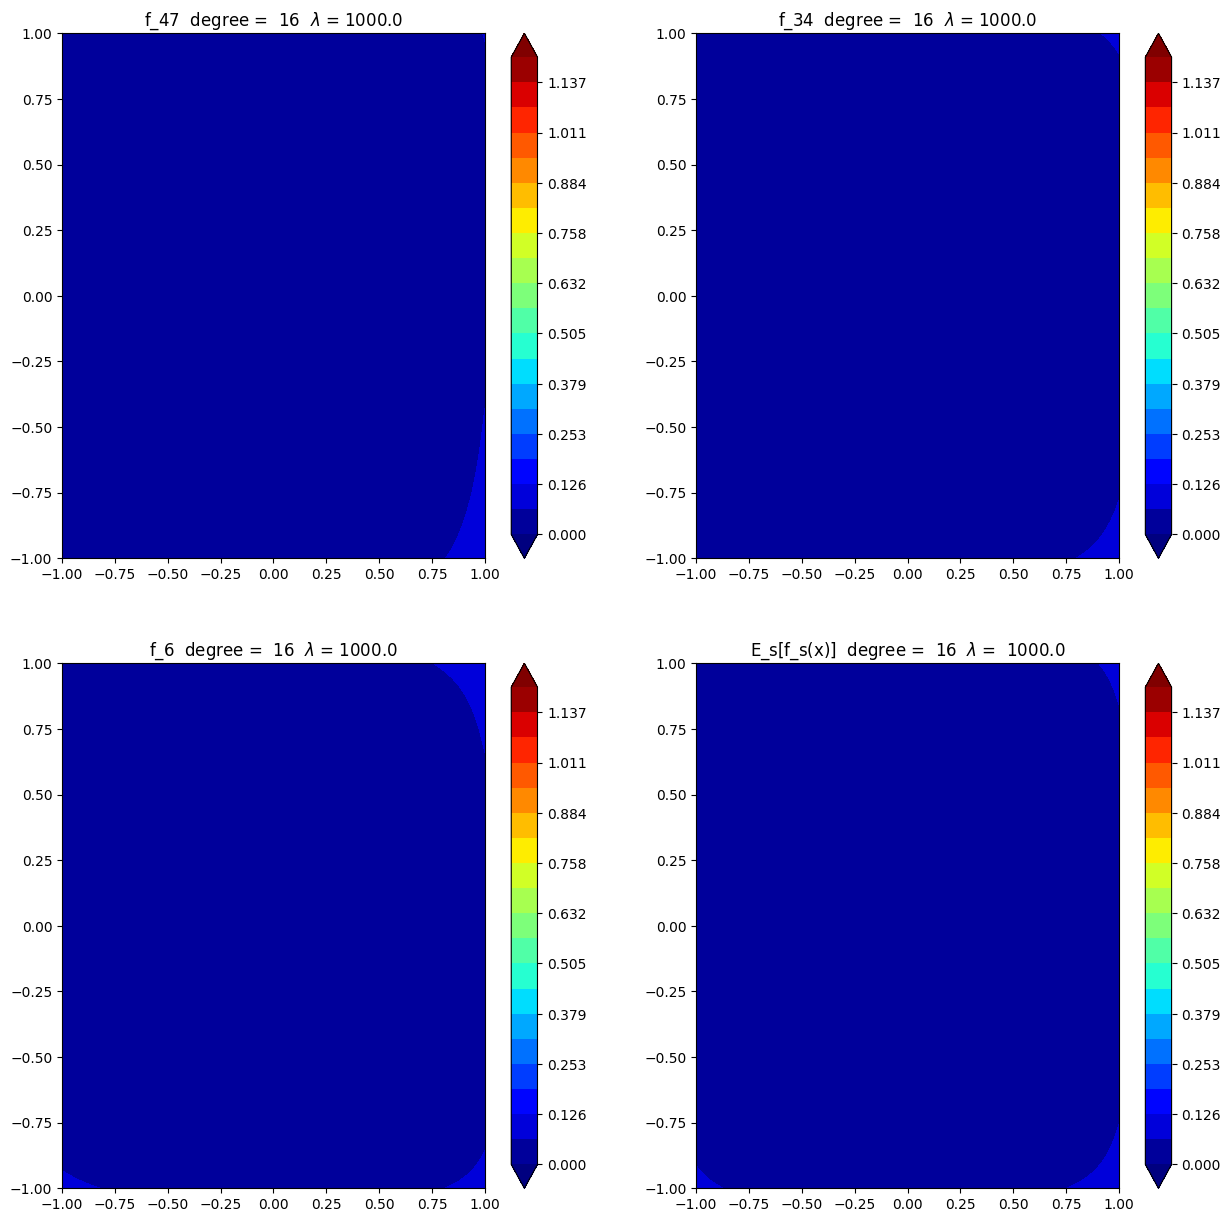

Degree= 16 lambda= 1000.0
Bias = 0.001067724714215779
Variance = 2.669581924930661e-05
MSE = 0.0010727764038488254


In [113]:
# Cell type : CodeWrite
subplotIndex = 1
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    phi = np.ones((X_test.shape[0], 1))
    x1 = np.zeros((len(X_test), 1 + degree))
    x2 = np.zeros((len(X_test), 1 + degree))

    for i in range(0, 1 + degree):
        x1[:, i] = X_test[:, 0] ** i
        x2[:, i] = X_test[:, 1] ** i

    for i in range(0, 1 + degree):
        for j in range(0, 1 + degree):
            if i != 0 or j != 0:
                if not i + j > degree:
                    phi = np.hstack((phi, (x1[:, j]*x2[:, i]).reshape(-1, 1)))

    return np.matmul(phi, wt_vector)
    

    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    Z = polynomial_regression_ridge_pred(np.hstack((X.copy().reshape(-1, 1), Y.copy().reshape(-1,1))), wt_vector, degree=degree).reshape(100,100)

    plt.subplot(2, 2, subplotIndex)
    plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 20), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = np.ones((X_train.shape[0], 1))
    x1 = np.zeros((len(X_train), 1 + degree))
    x2 = np.zeros((len(X_train), 1 + degree))

    for i in range(0, 1 + degree):
        x1[:, i] = X_train[:, 0] ** i
        x2[:, i] = X_train[:, 1] ** i

    for i in range(0, 1 + degree):
        for j in range(0, 1 + degree):
            if i != 0 or j != 0:
                if not i + j > degree:
                    phi = np.hstack((phi, (x1[:, j]*x2[:, i]).reshape(-1, 1)))

    w = np.linalg.inv((reg_param * np.eye(int((1 + degree)*(2 + degree)/2)) + np.matmul(phi.T, phi)))@(phi.T)@Y_train
    return w

    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 run_count. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 run_count.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    a = [0.5, 0.5]
    b = [-0.5, -0.5]
    c = [0.5, -0.5]
    f_S = np.zeros((10000, 100))
    Y_train = np.zeros((50, 1))
    X_test = np.random.uniform(-1, 1, (10000, 2))
    Y_test = np.zeros((10000, 1))
    Y_test[:] = np.exp(-4 * np.linalg.norm(X_test-a) ** 2) + np.exp(-4 *np.linalg.norm(X_test-b)**2) + np.exp(-4*np.linalg.norm(X_test-c)**2)
    y_hat = np.zeros((10000, 100))
    w = np.zeros((int((1 + degree)*(2 + degree)/2), 100))

    for run_count in range(0,100):
        X_train = np.random.uniform(low = [-1, -1], high = [1, 1], size = (num_training_samples, 2))
        Y_train = np.exp(-4*(np.sum((X_train-a)**2, axis=1))) + np.exp(-4*(np.sum((X_train-b)**2, axis=1))) + np.exp(-4*(np.sum((X_train-c)**2, axis=1)))
        temp = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        w[:, run_count] = np.reshape(temp, (int((degree+1)*(degree+2)/2,)))

    W_mean = np.mean(w, axis = 1)
    Y_mean = polynomial_regression_ridge_pred(X_test, W_mean, degree=degree)
    bias = np.mean((Y_test - Y_mean)**2)

    number = np.random.randint(low = 0, high = run_count - 1, size = 3)

    global subplotIndex
    plt.figure(figsize=(15, 15))
    for i in range(4):
        subplotIndex = i + 1
        if i == 3:
            visualise_polynomial_2d(W_mean, degree, title="E_s[f_s(x)]  degree =  {}  $\u03BB$ =  {}".format(degree, reg_param))
        else:
            visualise_polynomial_2d(w[:, number[i]], degree, title="f_{}  degree =  {}  $\u03BB$ = {}".format(number[i], degree, reg_param))
    plt.show()

    for i in range(run_count):
        y_hat[:, i] = polynomial_regression_ridge_pred(X_test, w[:, i], degree = degree)

    Y_mean = Y_mean.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)
    variance = np.mean((y_hat-Y_mean)**2)
    mse = np.mean((Y_test - y_hat)**2)
    return bias, variance, mse


for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

In [105]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

Bias 

Deg\λ| 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 
--- | --- | --- | --- | --- | --- | ---
1 | 0.28355607214948125 | 0.2861411180717221 | 0.2856234205021497 | 0.2793073549262634 | 0.185379321194297 | 0.0005744424052577639
2    |  0.3075879589320841 | 0.30565651529446547 | 0.31202598724572705 | 0.3118638531861433 | 0.19208969661045341 | 0.000785655419193222
4     | 0.3329149873763247 | 0.3226145079311574 | 0.3386704154136634 | 0.31213942218343166 | 0.1875955572177531 | 0.0009214279663490781 
8     | 0.3469381916866407 | 0.3340074311665964 | 0.3354992531639542  | 0.3188842089953492 | 0.1926703815202197 | 0.0009860002978260682
16    | 0.3569042510646869 | 0.3602917032761981 | 0.33548933461024316 | 0.32495176682278887  | 0.1945597764308968 | 0.001067724714215779 


Variance 

Deg\λ| 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 
--- | --- | --- | --- | --- | --- | ---
1     | 0.006650284708113028 | 0.007044985446695182 | 0.006785797250625439 | 0.006805874859815116  | 0.0034840424649166756 | 1.214447687296002e-05
2     | 0.008244400853698323 | 0.00818232883348078 | 0.008958223970886138 | 0.008874868395877297  | 0.0038029850703313467 | 1.447817278125786e-05
4     | 0.009844254693288632  | 0.011185082654684032 | 0.009544809360204253  | 0.006890601194890574 | 0.003824638199877432|1.8771199808747337e-05
8     | 0.17146489826825276  | 0.053013399171731514 | 0.02108480695565594  | 0.008390711093449306 |0.0041582684307257855  |2.5882667263686457e-05 
16    | 0.3391718560269175   | 0.14757111460182104  |0.05558844628251213  |0.011945002737991327  | 0.004657916381926488|2.669581924930661e-05 


Observations:

1. For low degree polynomial regressions, bias keeps increasing as λ is increased. Whereas for high degree ones, it's unclear at small λ's, but it holds good at high λ's. And as this degree rises, bias decreases till a certain level, after which we have a fewer data, casusing it to rise.
2. For variance : This is inverse of Observation 1, here high degree polynomial regreassions' variance keeps decreasing with λ. Whereas for low degree ones, it's unclear at small λ, but decreases at high λ's.
3. The above observations have been discussed in class as well.


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




/var/folders/nl/1mt3vbv178l4wkfxkw9dfjq00000gn/T/ipykernel_52256/2034113497.py:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  bestValues[i, :] = np.where(np.amin(test_err_sq[i, :, :]) == test_err_sq[i, :, :])


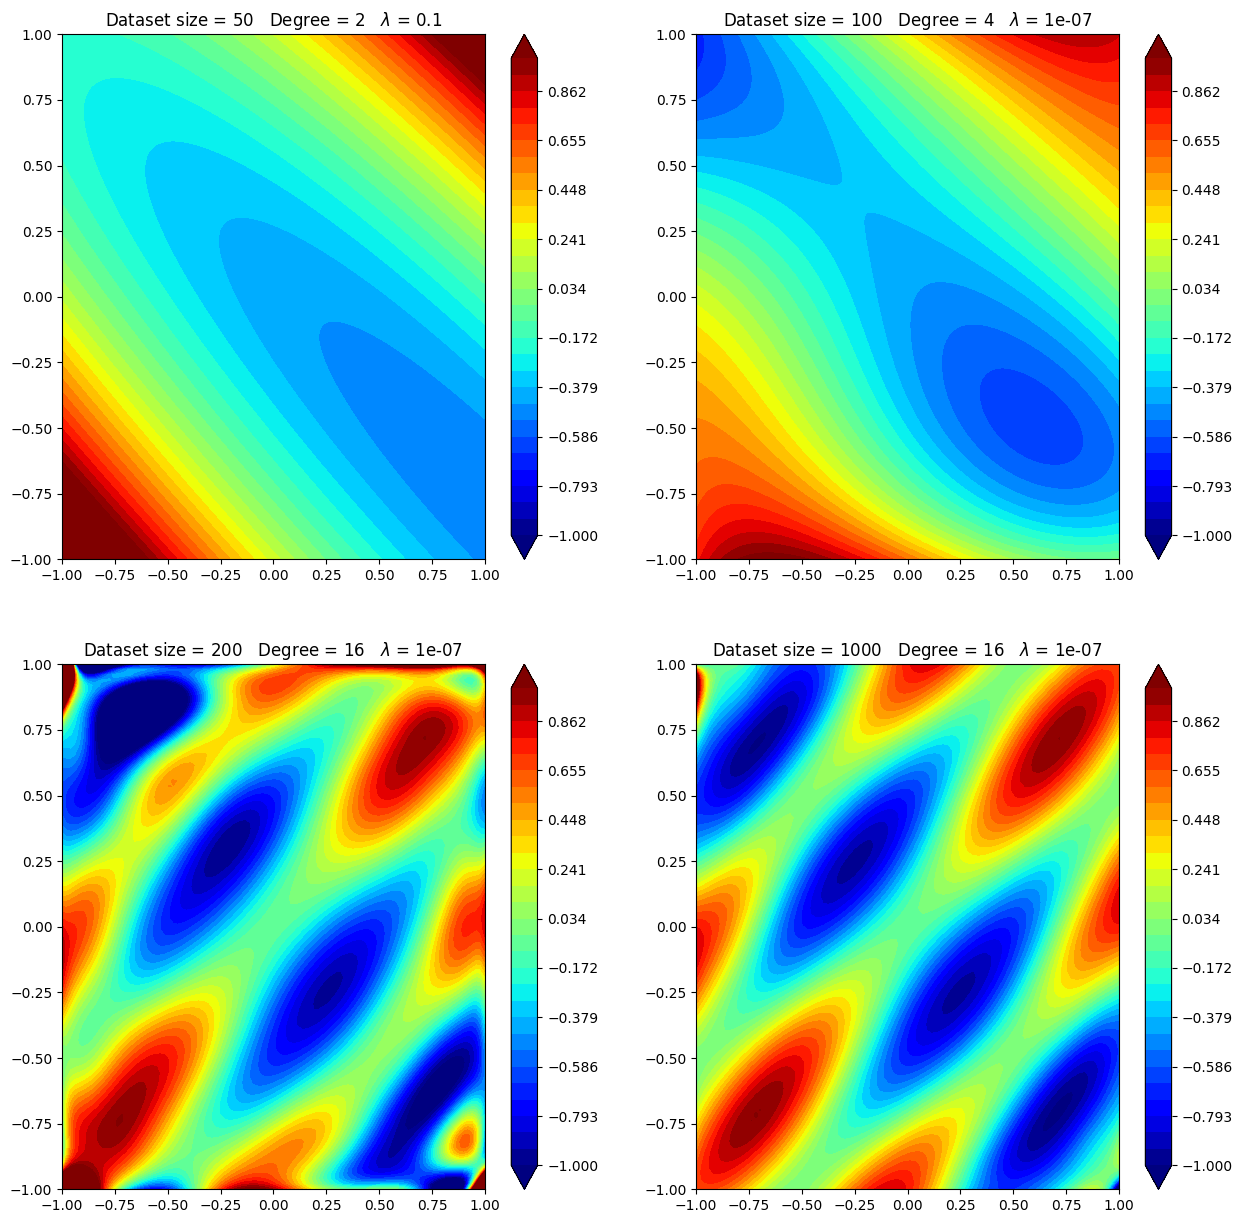

In [106]:
# Cell type : CodeWrite

data4_1 = np.load('Data/dataset4_1.npz')
X_train, Y_train, X_test, Y_test = data4_1['arr_0'], data4_1['arr_1'], data4_1['arr_2'], data4_1['arr_3']

bestValues = np.zeros((4, 2))
training_sizes = [50, 100, 200, 1000]
degree_matrix = [1, 2, 4, 8, 16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
train_err_sq = np.zeros((len(training_sizes), len(degree_matrix), len(reg_params)))
test_err_sq = np.zeros((len(training_sizes), len(degree_matrix), len(reg_params)))

for i in range(len(training_sizes)):
  for j in range(len(degree_matrix)):
    for k in range(len(reg_params)):
      W_pred = polynomial_regression_ridge_train(X_train[:training_sizes[i], :], Y_train[:training_sizes[i]], degree_matrix[j], reg_params[k])
      Y_training_pred = polynomial_regression_ridge_pred(X_train[:training_sizes[i], :], W_pred, degree_matrix[j])
      Y_testing_pred = polynomial_regression_ridge_pred(X_test, W_pred, degree_matrix[j])
      train_err_sq[i, j, k] = np.mean((Y_train[:training_sizes[i]]-Y_training_pred)**2)
      test_err_sq[i, j, k] = np.mean((Y_test-Y_testing_pred)**2)

for i in range(len(training_sizes)): #finding the best value using np.where
  bestValues[i, :] = np.where(np.amin(test_err_sq[i, :, :]) == test_err_sq[i, :, :])

X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
X_test = np.hstack((X.copy().reshape(-1, 1), Y.copy().reshape(-1, 1)))
plt.figure(figsize = (15, 15))

for i in range(len(training_sizes)):
  subplotIndex = i + 1
  Z = polynomial_regression_ridge_pred(X_test, polynomial_regression_ridge_train(X_train[:training_sizes[i], :], Y_train[:training_sizes[i]], degree_matrix[int(bestValues[i, 0])], reg_params[int(bestValues[i, 1])]), degree_matrix[int(bestValues[i, 0])]).reshape(100, 100)
  plt.subplot(2, 2, subplotIndex)
  plt.contourf(X, Y, Z, levels = np.linspace(-1, 1, 30),cmap='jet', extend='both')
  plt.title("Dataset size = {}   Degree = {}   $\u03BB$ = {}".format(training_sizes[i], degree_matrix[int(bestValues[i, 0])], reg_params[int(bestValues[i][1])]))
  plt.colorbar()
plt.show()

** Cell type : TextWrite **

Observations:

1. On smaller dadta sets, evaluating the test MSE's showed high values on high degree, and low for low degree polynomials, This is overfitting, where the high degre polynomial tries more on capturing noise rather than finding generalization. 
2. The inverse of Observation 1, happens for big data sets, here high degree polynomials fared better than low degree ones, as it had more scope to accomodate for the data (16 degree). This is for testing, but for training, high degree ones fare better among the lot with low lambda values.


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










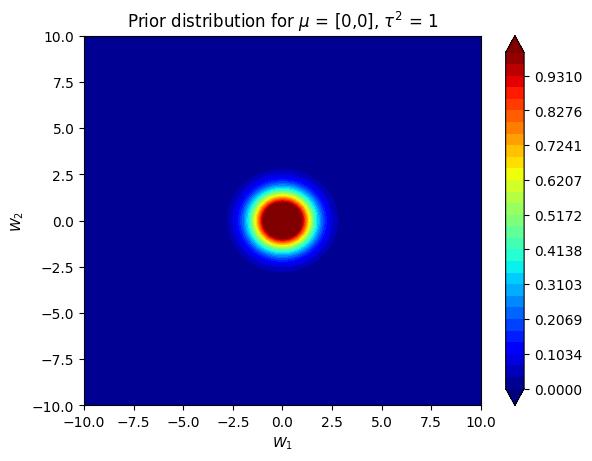

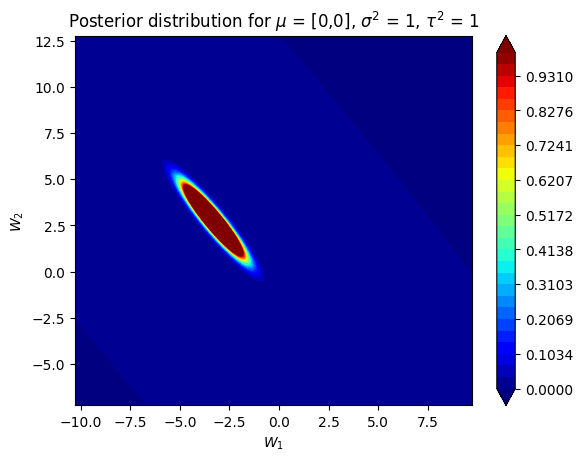

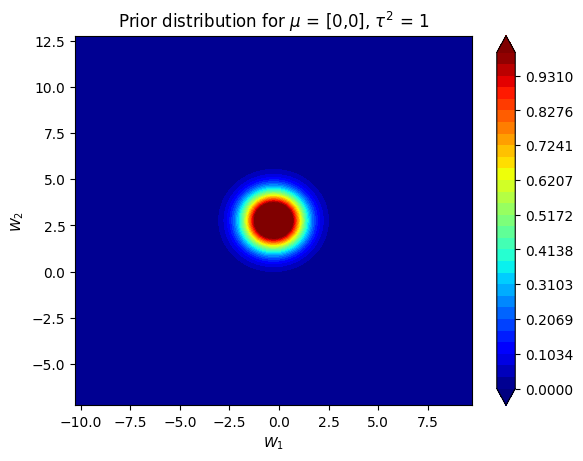

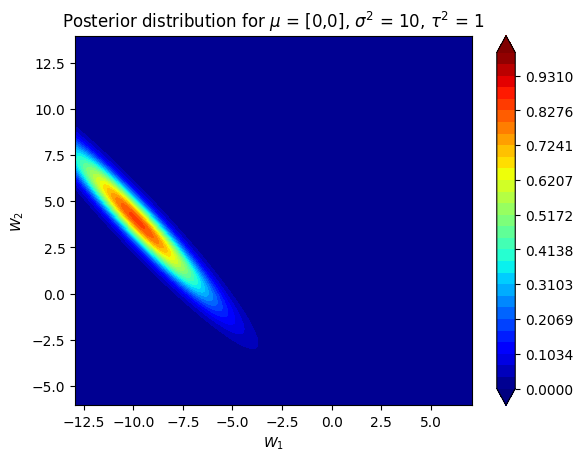

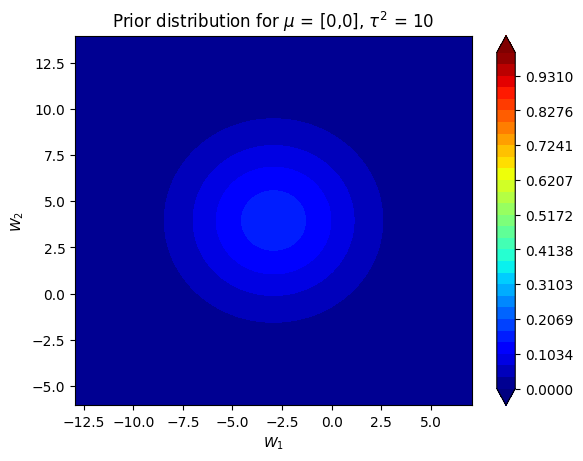

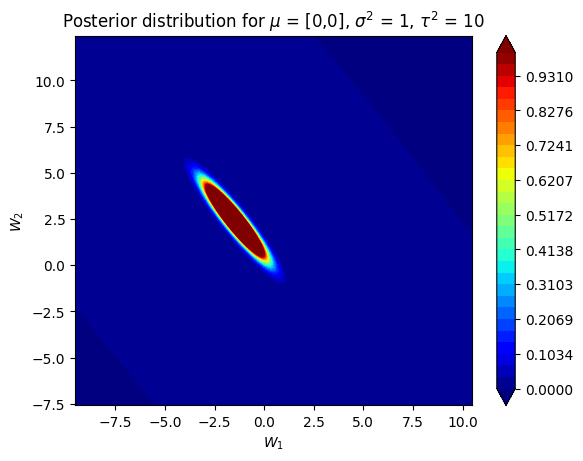

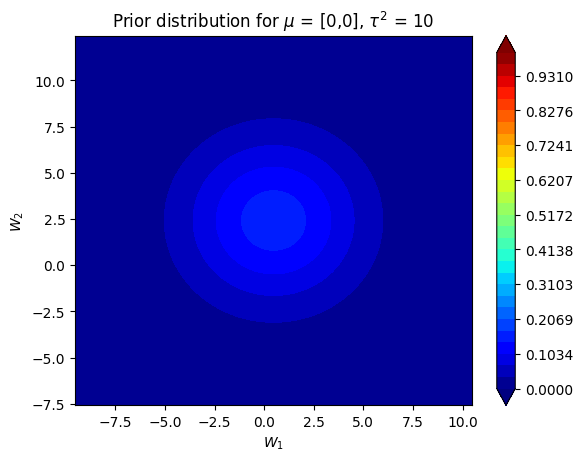

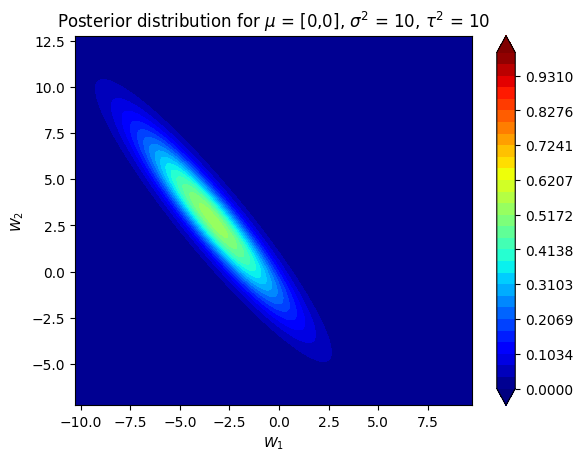

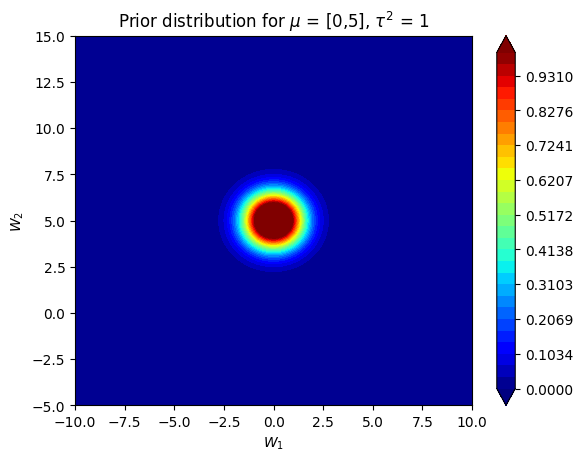

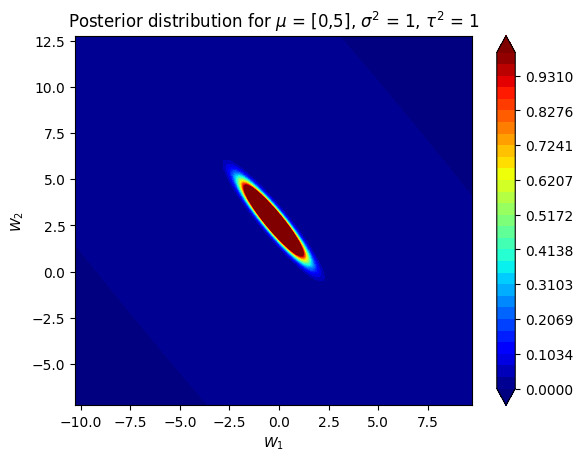

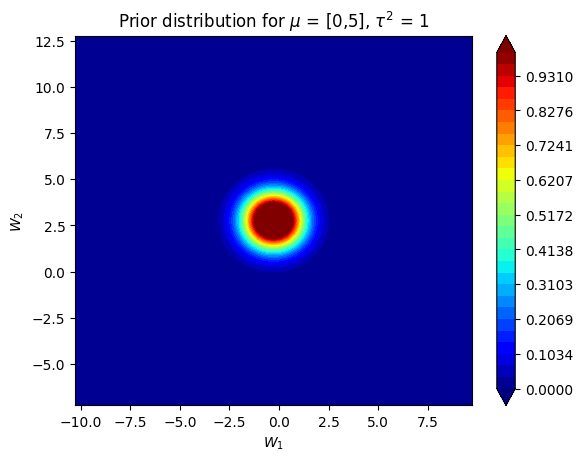

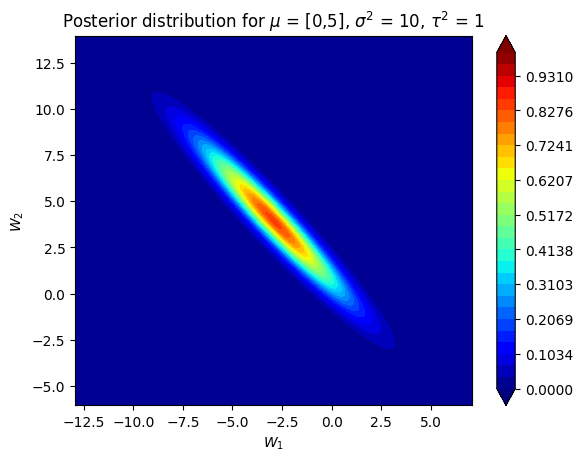

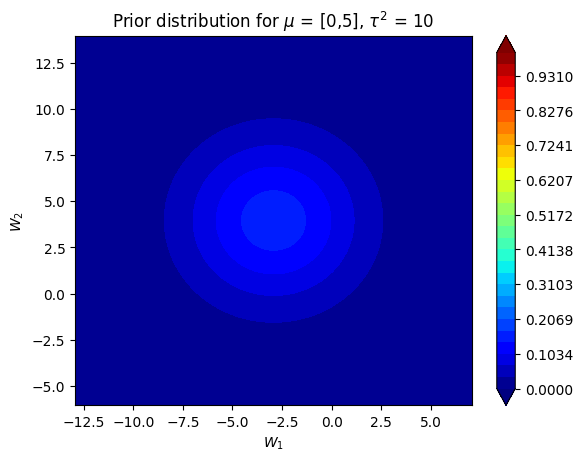

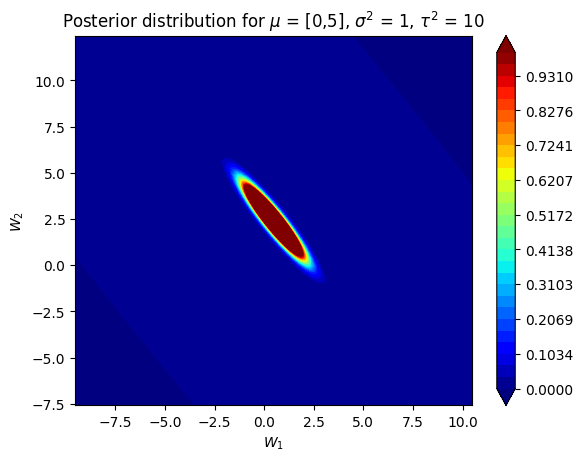

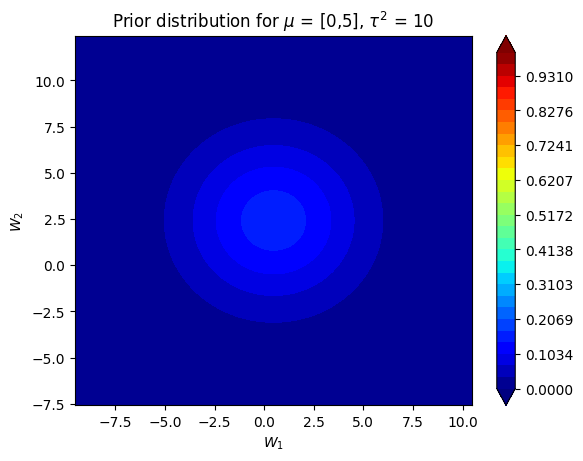

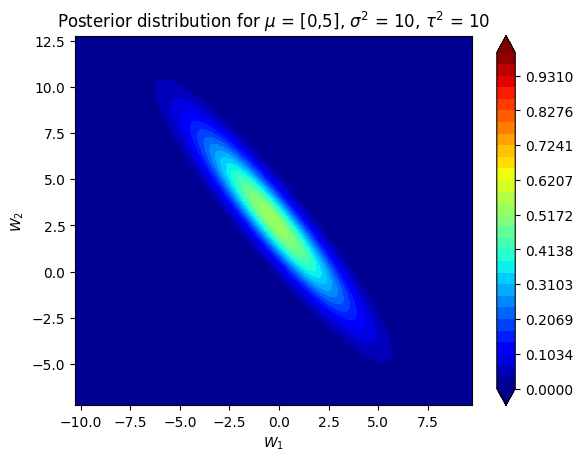

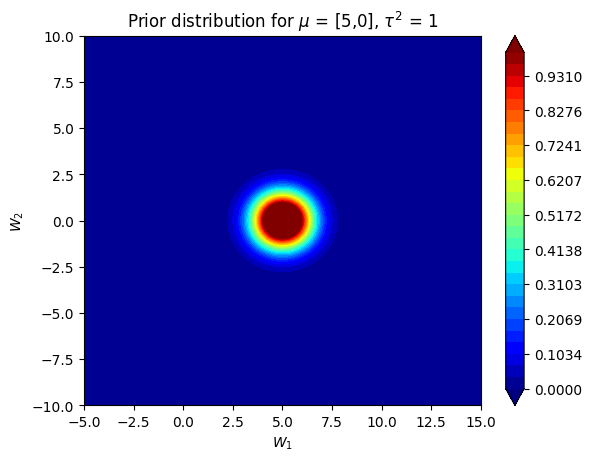

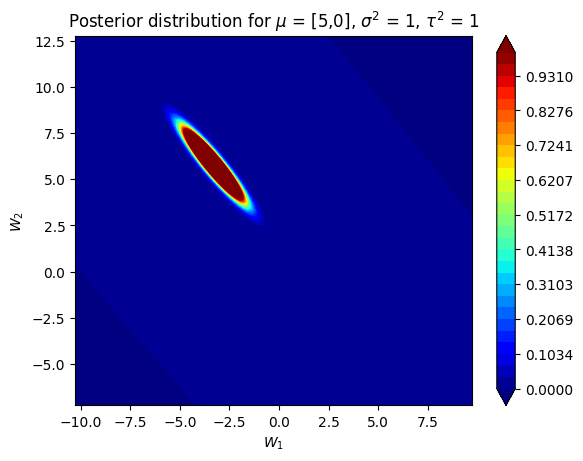

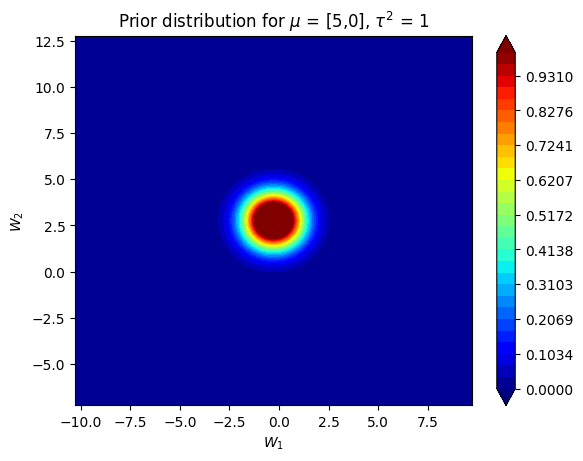

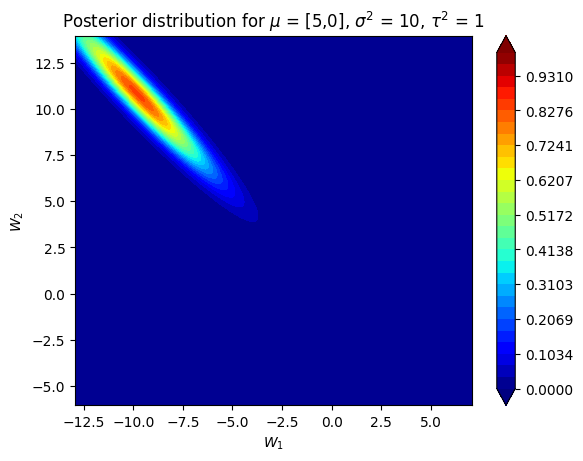

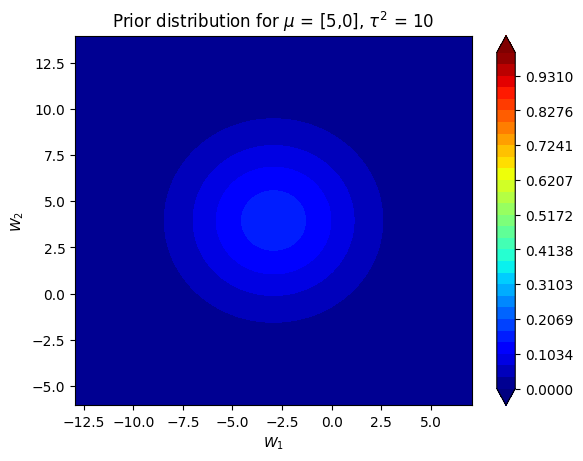

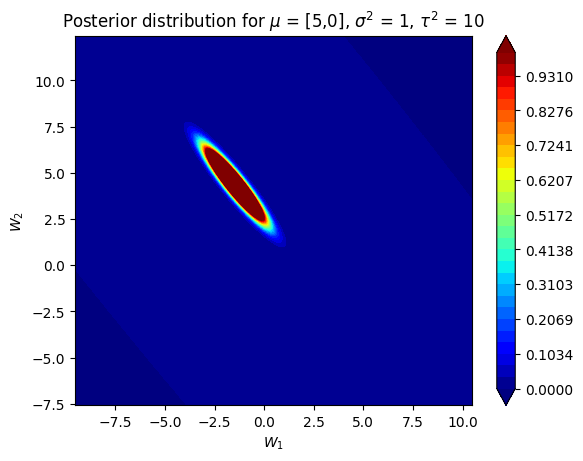

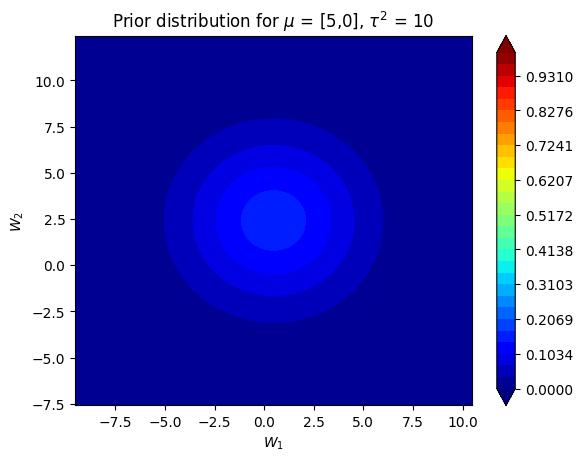

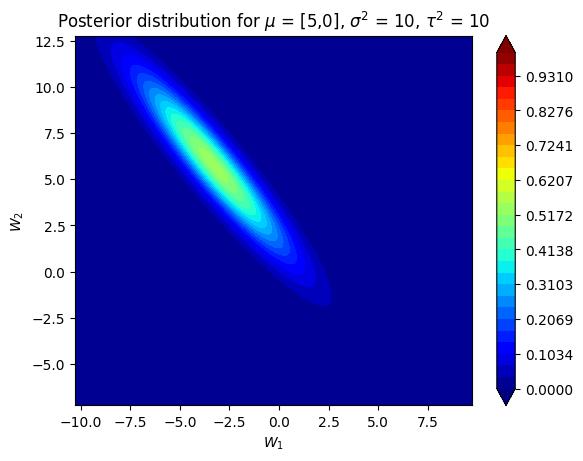

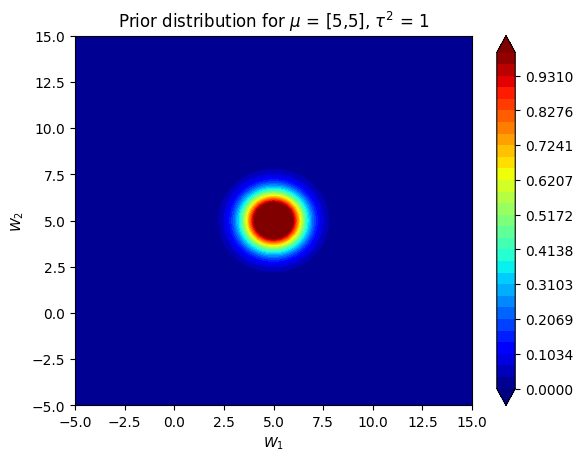

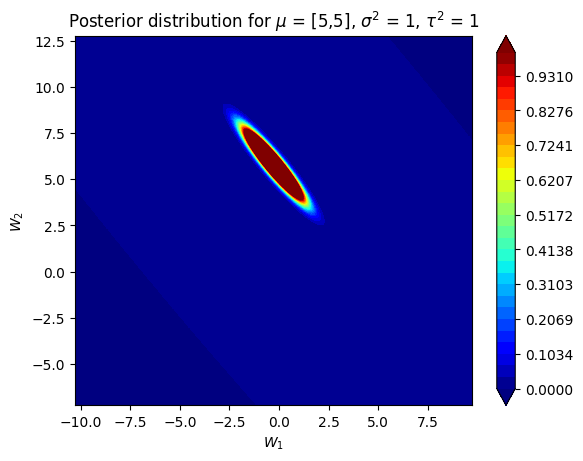

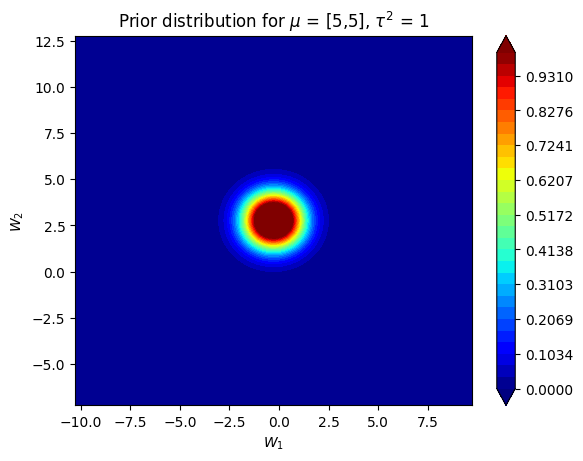

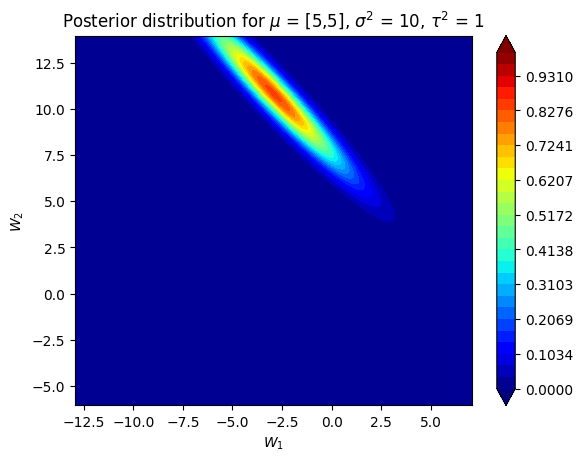

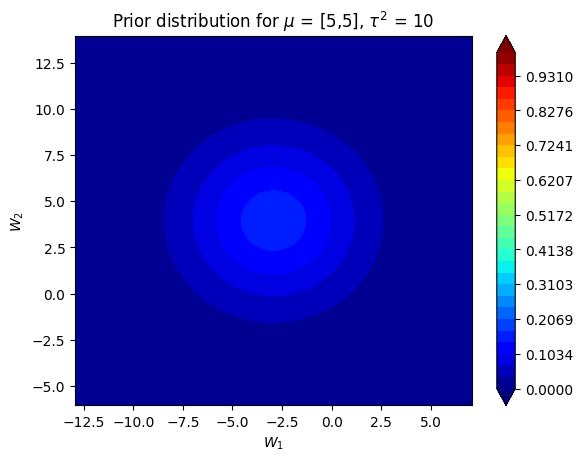

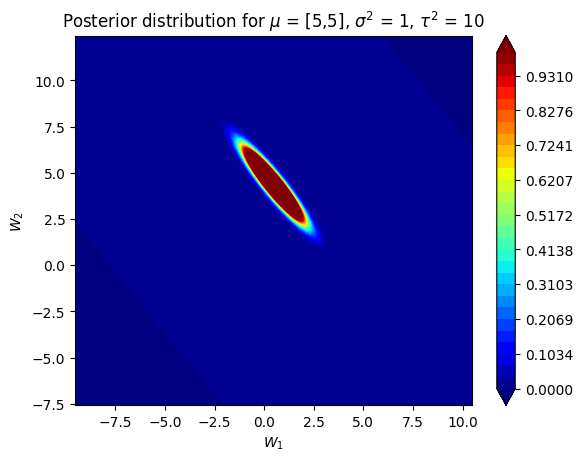

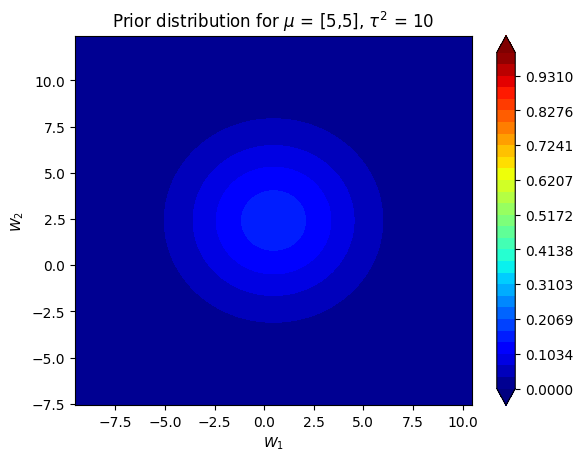

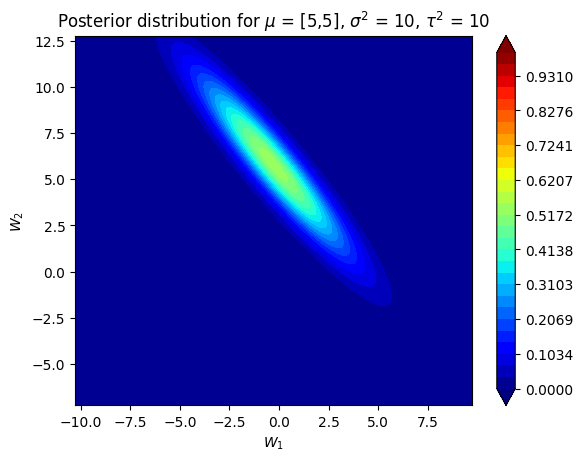

In [107]:
# Cell type : CodeWrite 

X_m = [[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]]
Y_m = [5.1,6.1,4.2,2.9]
Z = np.zeros((1000,1000))
Z1 = np.zeros((1000, 1000))
variance = [1,10]
tau_square = [1, 10]
mu_1 = [0,5]
mu_2 = [0,5]

for i in range(2):
    for j in range(2):
        w1 = np.linspace(mu_1[i] - 10, mu_1[i] + 10, 1000)
        w2 = np.linspace(mu_2[j] - 10, mu_2[j] + 10, 1000)
        X, Y = np.meshgrid(w1, w2)
        for k in range(2):
            prior_covar_inv = 1/ variance[k] * np.eye(2)
            for a in range(0, 1000):
                for b in range(0, 1000):
                    Z[a, b] = np.exp(-np.matmul(np.matmul(np.transpose(np.array([-mu_1[i] + w1[a], -mu_2[j] + w2[b]])), prior_covar_inv),np.array([-mu_1[i] + w1[a], -mu_2[j] + w2[b]]))/2) * np.sqrt(np.linalg.det(prior_covar_inv))/2*3.1415
            for l in range(2):
                plt.subplots(1, 1)
                plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 30), cmap='jet', extend='both')
                plt.title('Prior distribution for $\u03BC$ = [{},{}], $\u03C4^2$ = {}'.format(mu_1[i], mu_2[j], tau_square[k]))
                plt.colorbar()
                plt.xlabel('$W_1$')
                plt.ylabel('$W_2$')
                plt.show()

                cov_inv = 1/tau_square[k]+ np.matmul(np.transpose(X_m), X_m)/variance[l]
                mu = np.transpose(np.matmul(np.matmul(np.transpose(Y_m), X_m), np.linalg.inv(cov_inv))/variance[l])

                w_1 = np.linspace(mu[0] - 10, mu[0] + 10, 1000)
                w_2 = np.linspace(mu[1] - 10, mu[1] + 10, 1000)

                X, Y = np.meshgrid(w_1, w_2)
                for a in range(0, 1000):
                    for b in range(0, 1000):
                        Z1[a, b] = np.exp(-np.matmul(np.matmul(np.transpose(np.array([-mu[i] + w_1[a], -mu[j] + w_2[b]])), cov_inv),np.array([-mu[i] + w_1[a], -mu[j] + w_2[b]]))/2) * np.sqrt(np.linalg.det(cov_inv))/2*3.1415

                plt.subplots(1, 1)
                plt.contourf(X, Y, Z1, levels = np.linspace(0, 1., 30), cmap='jet', extend='both')
                plt.title('Posterior distribution for $\u03BC$ = [{},{}], $\u03C3^2$ = {}, $\u03C4^2$ = {}'.format(mu_1[i], mu_2[j], variance[l], tau_square[k]))
                plt.colorbar()
                plt.xlabel('$W_1$')
                plt.ylabel('$W_2$')
                plt.show()

** Cell type : TextWrite **

Observations:

Observed data has more impact on posterior when variance is smaller than tau^2, as we're more unsure about prior. All the posterior distributions above turned out to be Normal distributions, for which the dependence on data is as mentioned before.